# Analysis of COVID-19 Data from The New York Times

*Author: Mark Bauer*  
*Date: March 28, 2020*

The New York Times Github Data [Repository](https://github.com/nytimes/covid-19-data).   
The New York Time [News Article](https://www.nytimes.com/article/coronavirus-county-data-us.html).  
The New York Times COVID-19 US Map: https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.   
The New York Times COVID-19 Global Map: https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html.

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

covid_19_state_data = pd.read_csv(url)

In [4]:
covid_19_state_data.head(10)

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
5  2020-01-25  California     6      1       0
6  2020-01-25    Illinois    17      1       0
7  2020-01-25  Washington    53      1       0
8  2020-01-26     Arizona     4      1       0
9  2020-01-26  California     6      2       0

In [5]:
table = covid_19_state_data.sort_values(by=['date', 'cases'], 
                                ascending=[False, False]).drop_duplicates(subset ="state", 
                                keep = 'first').reset_index(drop=True).head(10)

table['cases'] = table['cases'].map('{:,}'.format)
table['deaths'] = table['deaths'].map('{:,}'.format)
table.drop('fips', axis=1, inplace=True)
                 
print(table.to_markdown())

|    | date       | state         | cases   | deaths   |
|---:|:-----------|:--------------|:--------|:---------|
|  0 | 2020-04-06 | New York      | 130,703 | 4,758    |
|  1 | 2020-04-06 | New Jersey    | 41,090  | 1,005    |
|  2 | 2020-04-06 | Michigan      | 17,130  | 727      |
|  3 | 2020-04-06 | California    | 16,284  | 386      |
|  4 | 2020-04-06 | Louisiana     | 14,867  | 512      |
|  5 | 2020-04-06 | Massachusetts | 13,837  | 260      |
|  6 | 2020-04-06 | Florida       | 13,621  | 253      |
|  7 | 2020-04-06 | Pennsylvania  | 13,074  | 169      |
|  8 | 2020-04-06 | Illinois      | 12,262  | 309      |
|  9 | 2020-04-06 | Washington    | 8,384   | 383      |


In [6]:
covid_19_state_data.shape

(1939, 5)

In [7]:
print('New York Times COVID-19 data as of', covid_19_state_data.sort_values(by='date', 
                                   ascending=False)['date'].iloc[0])

New York Times COVID-19 data as of 2020-04-06


In [8]:
current_date = covid_19_state_data.sort_values(by='date', ascending=False)['date'].iloc[0]

In [9]:
print('The current date of this notebook is', current_date)

The current date of this notebook is 2020-04-06


In [10]:
covid_19_state_data.date = pd.to_datetime(covid_19_state_data.date, infer_datetime_format=True)

In [11]:
covid_19_state_data.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

In [12]:
drop_duplicates_ts = covid_19_state_data.sort_values(by="cases", ascending=False).drop_duplicates(
                                                    subset ="state", keep = 'first')
top_10 = drop_duplicates_ts[0:10]
top10_list = list(top_10.state)
top_10_ts  = covid_19_state_data.loc[covid_19_state_data['state'].isin(top10_list)]

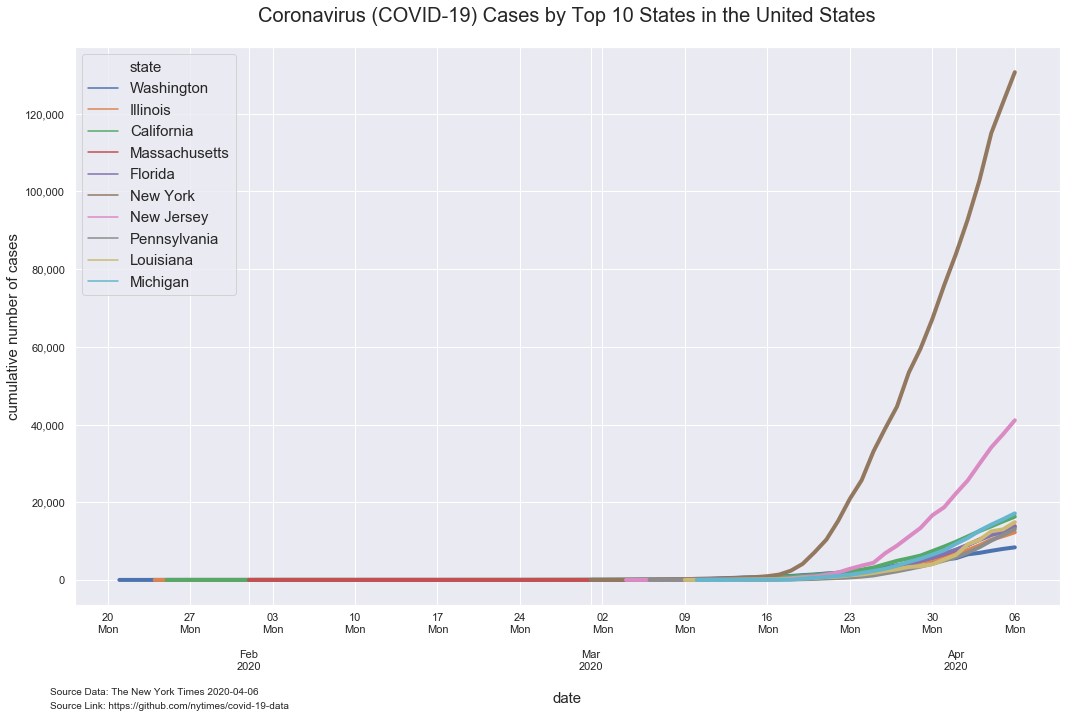

In [13]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10_ts, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('date', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Top 10 States in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries')

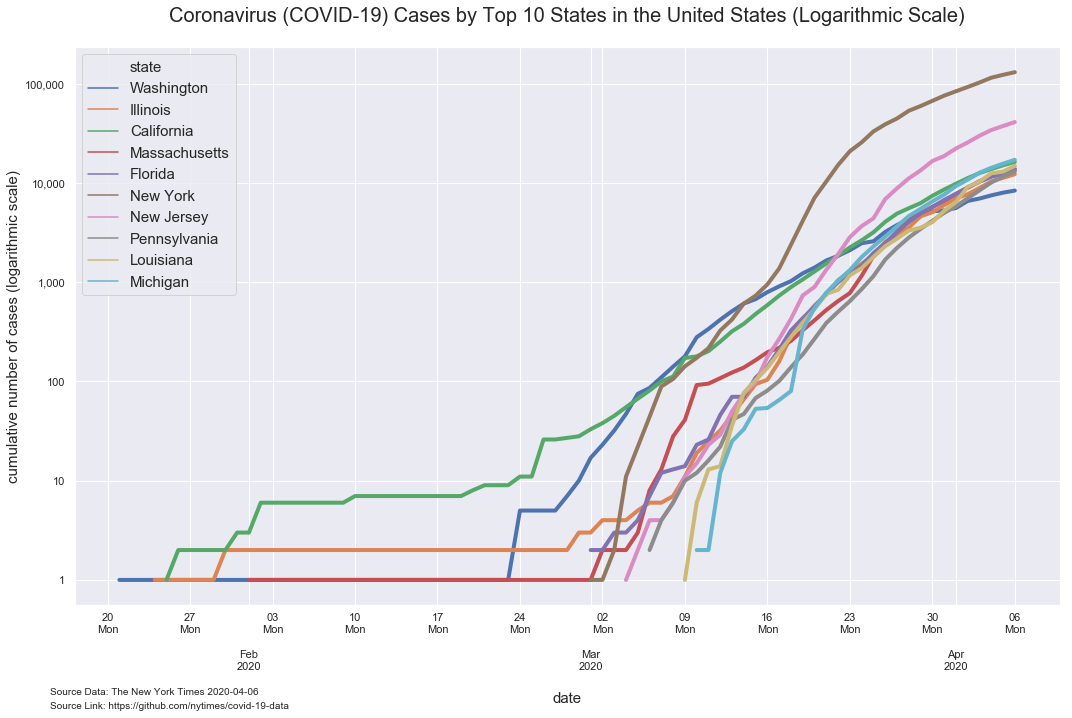

In [14]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10_ts, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('date', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Top 10 States in the United States (Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-log')

In [15]:
state_first_case = top_10_ts.sort_values(by=['date', 'cases'], 
                                         ascending=[True, True]).drop_duplicates(subset ="state", 
                                         keep = 'first').reset_index(drop=True)

In [16]:
state_first_case = state_first_case[['date', 'state']]
state_first_case.rename(columns={'date': 'date_first_case'}, inplace=True)

In [17]:
state_first_case

date_first_case          state
0      2020-01-21     Washington
1      2020-01-24       Illinois
2      2020-01-25     California
3      2020-02-01  Massachusetts
4      2020-03-01       New York
5      2020-03-01        Florida
6      2020-03-04     New Jersey
7      2020-03-06   Pennsylvania
8      2020-03-09      Louisiana
9      2020-03-10       Michigan

In [18]:
state_first_case = top_10_ts.merge(state_first_case, left_on='state', right_on='state')

In [19]:
state_first_case

date       state  fips  cases  deaths date_first_case
0   2020-01-21  Washington    53      1       0      2020-01-21
1   2020-01-22  Washington    53      1       0      2020-01-21
2   2020-01-23  Washington    53      1       0      2020-01-21
3   2020-01-24  Washington    53      1       0      2020-01-21
4   2020-01-25  Washington    53      1       0      2020-01-21
..         ...         ...   ...    ...     ...             ...
482 2020-04-02    Michigan    26  10791     417      2020-03-10
483 2020-04-03    Michigan    26  12670     478      2020-03-10
484 2020-04-04    Michigan    26  14225     540      2020-03-10
485 2020-04-05    Michigan    26  15635     616      2020-03-10
486 2020-04-06    Michigan    26  17130     727      2020-03-10

[487 rows x 6 columns]

In [20]:
state_first_case['time_difference'] = (state_first_case['date'] - 
                                       state_first_case['date_first_case']).dt.days

In [21]:
state_first_case.sort_values(by='date')

date         state  fips   cases  deaths date_first_case  \
0   2020-01-21    Washington    53       1       0      2020-01-21   
1   2020-01-22    Washington    53       1       0      2020-01-21   
2   2020-01-23    Washington    53       1       0      2020-01-21   
3   2020-01-24    Washington    53       1       0      2020-01-21   
77  2020-01-24      Illinois    17       1       0      2020-01-24   
..         ...           ...   ...     ...     ...             ...   
397 2020-04-06    New Jersey    34   41090    1005      2020-03-04   
150 2020-04-06      Illinois    17   12262     309      2020-01-24   
429 2020-04-06  Pennsylvania    42   13074     169      2020-03-06   
363 2020-04-06      New York    36  130703    4758      2020-03-01   
486 2020-04-06      Michigan    26   17130     727      2020-03-10   

     time_difference  
0                  0  
1                  1  
2                  2  
3                  3  
77                 0  
..               ...  
397               33  
150               73  
429               31  
363               36  
486               27  

[487 rows x 7 columns]

In [22]:
state_first_case.sort_values(by='time_difference')

date       state  fips  cases  deaths date_first_case  \
0   2020-01-21  Washington    53      1       0      2020-01-21   
290 2020-03-01     Florida    12      2       0      2020-03-01   
151 2020-01-25  California     6      1       0      2020-01-25   
327 2020-03-01    New York    36      1       0      2020-03-01   
364 2020-03-04  New Jersey    34      1       0      2020-03-04   
..         ...         ...   ...    ...     ...             ...   
73  2020-04-03  Washington    53   6966     293      2020-01-21   
150 2020-04-06    Illinois    17  12262     309      2020-01-24   
74  2020-04-04  Washington    53   7498     318      2020-01-21   
75  2020-04-05  Washington    53   7984     344      2020-01-21   
76  2020-04-06  Washington    53   8384     383      2020-01-21   

     time_difference  
0                  0  
290                0  
151                0  
327                0  
364                0  
..               ...  
73                73  
150               73  
74                74  
75                75  
76                76  

[487 rows x 7 columns]

In [23]:
trajectory_top_states_first_case_growth_rate = state_first_case.sort_values(by=['state', 'date', 'cases'], 
                                              ascending=[True, True, True])

In [24]:
trajectory_top_states_first_case_growth_rate.head(25)

date       state  fips  cases  deaths date_first_case  \
151 2020-01-25  California     6      1       0      2020-01-25   
152 2020-01-26  California     6      2       0      2020-01-25   
153 2020-01-27  California     6      2       0      2020-01-25   
154 2020-01-28  California     6      2       0      2020-01-25   
155 2020-01-29  California     6      2       0      2020-01-25   
156 2020-01-30  California     6      2       0      2020-01-25   
157 2020-01-31  California     6      3       0      2020-01-25   
158 2020-02-01  California     6      3       0      2020-01-25   
159 2020-02-02  California     6      6       0      2020-01-25   
160 2020-02-03  California     6      6       0      2020-01-25   
161 2020-02-04  California     6      6       0      2020-01-25   
162 2020-02-05  California     6      6       0      2020-01-25   
163 2020-02-06  California     6      6       0      2020-01-25   
164 2020-02-07  California     6      6       0      2020-01-25   
165 2020-02-08  California     6      6       0      2020-01-25   
166 2020-02-09  California     6      6       0      2020-01-25   
167 2020-02-10  California     6      7       0      2020-01-25   
168 2020-02-11  California     6      7       0      2020-01-25   
169 2020-02-12  California     6      7       0      2020-01-25   
170 2020-02-13  California     6      7       0      2020-01-25   
171 2020-02-14  California     6      7       0      2020-01-25   
172 2020-02-15  California     6      7       0      2020-01-25   
173 2020-02-16  California     6      7       0      2020-01-25   
174 2020-02-17  California     6      7       0      2020-01-25   
175 2020-02-18  California     6      7       0      2020-01-25   

     time_difference  
151                0  
152                1  
153                2  
154                3  
155                4  
156                5  
157                6  
158                7  
159                8  
160                9  
161               10  
162               11  
163               12  
164               13  
165               14  
166               15  
167               16  
168               17  
169               18  
170               19  
171               20  
172               21  
173               22  
174               23  
175               24

In [25]:
trajectory_top_states_first_case_growth_rate['growth_rate'] = (trajectory_top_states_first_case_growth_rate.cases / 
                                               trajectory_top_states_first_case_growth_rate.cases.shift(1))

In [26]:
trajectory_top_states_first_case_growth_rate = trajectory_top_states_first_case_growth_rate.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False], ).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [27]:
trajectory_top_states_first_case_growth_rate.growth_rate = trajectory_top_states_first_case_growth_rate.growth_rate.round(2)

In [28]:
trajectory_top_states_first_case_growth_rate

date          state  fips   cases  deaths date_first_case  \
0 2020-04-06       New York    36  130703    4758      2020-03-01   
1 2020-04-06     New Jersey    34   41090    1005      2020-03-04   
2 2020-04-06       Michigan    26   17130     727      2020-03-10   
3 2020-04-06     California     6   16284     386      2020-01-25   
4 2020-04-06      Louisiana    22   14867     512      2020-03-09   
5 2020-04-06  Massachusetts    25   13837     260      2020-02-01   
6 2020-04-06        Florida    12   13621     253      2020-03-01   
7 2020-04-06   Pennsylvania    42   13074     169      2020-03-06   
8 2020-04-06       Illinois    17   12262     309      2020-01-24   
9 2020-04-06     Washington    53    8384     383      2020-01-21   

   time_difference  growth_rate  
0               36         1.06  
1               33         1.10  
2               27         1.10  
3               72         1.08  
4               28         1.14  
5               65         1.11  
6               36         1.10  
7               31         1.13  
8               73         1.09  
9               76         1.05

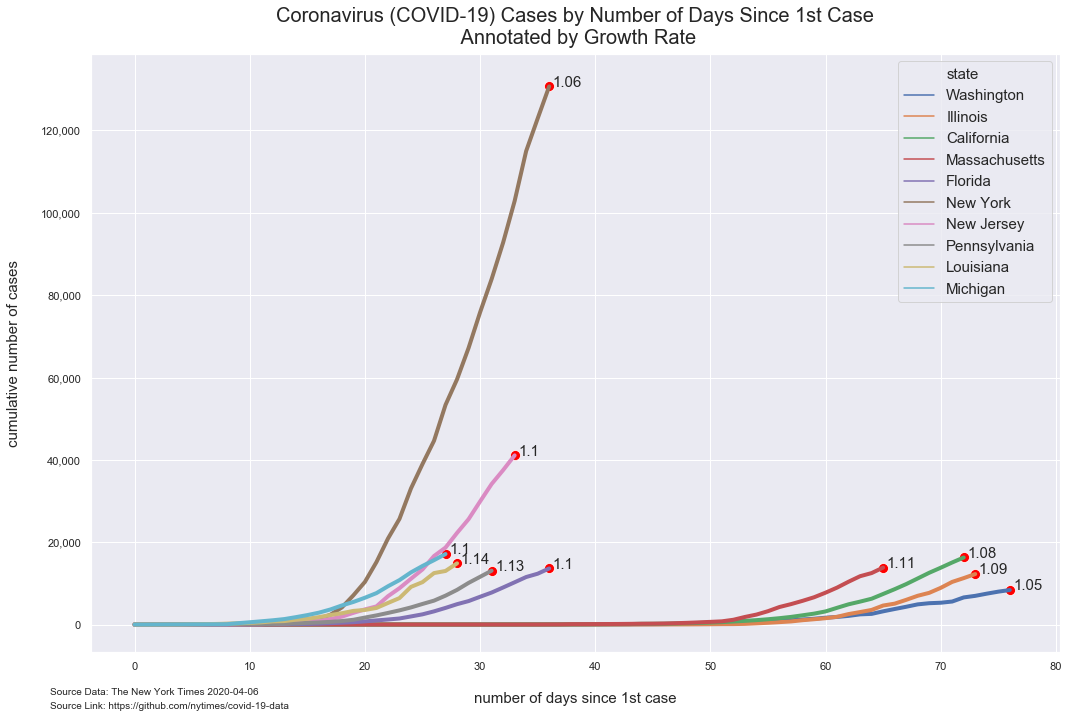

In [29]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_first_case, linewidth=4)

sns.scatterplot(x="time_difference", y="cases", 
                data=trajectory_top_states_first_case_growth_rate, s=100, ax=ax1, color='red')

x = trajectory_top_states_first_case_growth_rate.cases
z = trajectory_top_states_first_case_growth_rate.time_difference
n = trajectory_top_states_first_case_growth_rate.growth_rate
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)
#ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 1st case', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 1st Case\n Annotated by Growth Rate', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-first-case')

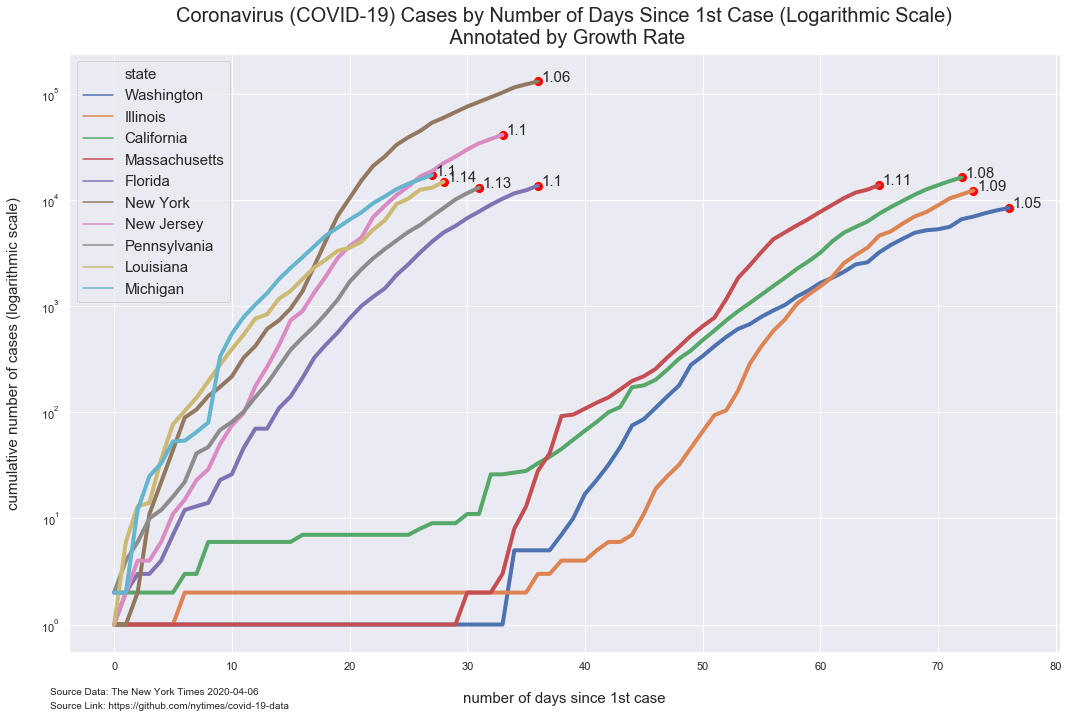

In [30]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_first_case, linewidth=4)

sns.scatterplot(x="time_difference", y="cases", 
                data=trajectory_top_states_first_case_growth_rate, s=100, ax=ax1, color='red')

x = trajectory_top_states_first_case_growth_rate.cases
z = trajectory_top_states_first_case_growth_rate.time_difference
n = trajectory_top_states_first_case_growth_rate.growth_rate
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)

ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 1st case', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 1st Case (Logarithmic Scale)\n Annotated by Growth Rate',
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-first-case-log')

In [31]:
state_first_case

date       state  fips  cases  deaths date_first_case  \
0   2020-01-21  Washington    53      1       0      2020-01-21   
1   2020-01-22  Washington    53      1       0      2020-01-21   
2   2020-01-23  Washington    53      1       0      2020-01-21   
3   2020-01-24  Washington    53      1       0      2020-01-21   
4   2020-01-25  Washington    53      1       0      2020-01-21   
..         ...         ...   ...    ...     ...             ...   
482 2020-04-02    Michigan    26  10791     417      2020-03-10   
483 2020-04-03    Michigan    26  12670     478      2020-03-10   
484 2020-04-04    Michigan    26  14225     540      2020-03-10   
485 2020-04-05    Michigan    26  15635     616      2020-03-10   
486 2020-04-06    Michigan    26  17130     727      2020-03-10   

     time_difference  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4  
..               ...  
482               23  
483               24  
484               25  
485               26  
486               27  

[487 rows x 7 columns]

In [32]:
state_ten_cases = top_10_ts.loc[top_10_ts.cases >= 10]

In [33]:
state_ten_cases = state_ten_cases.sort_values(by=['date', 'cases'], ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [34]:
state_ten_cases = state_ten_cases[['date', 'state']]
state_ten_cases.rename(columns={'date': 'date_ten_case'}, inplace=True)

In [35]:
state_ten_cases

date_ten_case          state
0    2020-02-24     California
1    2020-02-29     Washington
2    2020-03-04       New York
3    2020-03-07        Florida
4    2020-03-07  Massachusetts
5    2020-03-09   Pennsylvania
6    2020-03-09       Illinois
7    2020-03-09     New Jersey
8    2020-03-11      Louisiana
9    2020-03-12       Michigan

In [36]:
state_ten_cases = top_10_ts.merge(state_ten_cases, left_on='state', right_on='state')

In [37]:
state_ten_cases

date       state  fips  cases  deaths date_ten_case
0   2020-01-21  Washington    53      1       0    2020-02-29
1   2020-01-22  Washington    53      1       0    2020-02-29
2   2020-01-23  Washington    53      1       0    2020-02-29
3   2020-01-24  Washington    53      1       0    2020-02-29
4   2020-01-25  Washington    53      1       0    2020-02-29
..         ...         ...   ...    ...     ...           ...
482 2020-04-02    Michigan    26  10791     417    2020-03-12
483 2020-04-03    Michigan    26  12670     478    2020-03-12
484 2020-04-04    Michigan    26  14225     540    2020-03-12
485 2020-04-05    Michigan    26  15635     616    2020-03-12
486 2020-04-06    Michigan    26  17130     727    2020-03-12

[487 rows x 6 columns]

In [38]:
state_ten_cases = state_ten_cases.loc[state_ten_cases.cases >= 10]

In [39]:
state_ten_cases

date       state  fips  cases  deaths date_ten_case
39  2020-02-29  Washington    53     10       1    2020-02-29
40  2020-03-01  Washington    53     17       3    2020-02-29
41  2020-03-02  Washington    53     23       6    2020-02-29
42  2020-03-03  Washington    53     32      10    2020-02-29
43  2020-03-04  Washington    53     47      11    2020-02-29
..         ...         ...   ...    ...     ...           ...
482 2020-04-02    Michigan    26  10791     417    2020-03-12
483 2020-04-03    Michigan    26  12670     478    2020-03-12
484 2020-04-04    Michigan    26  14225     540    2020-03-12
485 2020-04-05    Michigan    26  15635     616    2020-03-12
486 2020-04-06    Michigan    26  17130     727    2020-03-12

[317 rows x 6 columns]

In [40]:
state_ten_cases['time_difference'] = (state_ten_cases['date'] - 
                                      state_ten_cases['date_ten_case']).dt.days

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
state_ten_cases

date       state  fips  cases  deaths date_ten_case  time_difference
39  2020-02-29  Washington    53     10       1    2020-02-29                0
40  2020-03-01  Washington    53     17       3    2020-02-29                1
41  2020-03-02  Washington    53     23       6    2020-02-29                2
42  2020-03-03  Washington    53     32      10    2020-02-29                3
43  2020-03-04  Washington    53     47      11    2020-02-29                4
..         ...         ...   ...    ...     ...           ...              ...
482 2020-04-02    Michigan    26  10791     417    2020-03-12               21
483 2020-04-03    Michigan    26  12670     478    2020-03-12               22
484 2020-04-04    Michigan    26  14225     540    2020-03-12               23
485 2020-04-05    Michigan    26  15635     616    2020-03-12               24
486 2020-04-06    Michigan    26  17130     727    2020-03-12               25

[317 rows x 7 columns]

In [42]:
state_ten_cases['daily_cases'] = (state_ten_cases.cases -
                                state_ten_cases.cases.shift(1))

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
state_ten_cases

date       state  fips  cases  deaths date_ten_case  \
39  2020-02-29  Washington    53     10       1    2020-02-29   
40  2020-03-01  Washington    53     17       3    2020-02-29   
41  2020-03-02  Washington    53     23       6    2020-02-29   
42  2020-03-03  Washington    53     32      10    2020-02-29   
43  2020-03-04  Washington    53     47      11    2020-02-29   
..         ...         ...   ...    ...     ...           ...   
482 2020-04-02    Michigan    26  10791     417    2020-03-12   
483 2020-04-03    Michigan    26  12670     478    2020-03-12   
484 2020-04-04    Michigan    26  14225     540    2020-03-12   
485 2020-04-05    Michigan    26  15635     616    2020-03-12   
486 2020-04-06    Michigan    26  17130     727    2020-03-12   

     time_difference  daily_cases  
39                 0          NaN  
40                 1          7.0  
41                 2          6.0  
42                 3          9.0  
43                 4         15.0  
..               ...          ...  
482               21       1498.0  
483               22       1879.0  
484               23       1555.0  
485               24       1410.0  
486               25       1495.0  

[317 rows x 8 columns]

In [44]:
state_ten_cases.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'date_ten_case',
       'time_difference', 'daily_cases'],
      dtype='object')

In [45]:
state_ten_cases = state_ten_cases[['date', 'state', 'fips', 'cases',  
                                   'daily_cases', 'deaths', 'date_ten_case','time_difference']]

In [46]:
state_ten_cases[250:300]

date         state  fips  cases  daily_cases  deaths date_ten_case  \
416 2020-03-24  Pennsylvania    42    851        207.0       7    2020-03-09   
417 2020-03-25  Pennsylvania    42   1151        300.0      11    2020-03-09   
418 2020-03-26  Pennsylvania    42   1690        539.0      16    2020-03-09   
419 2020-03-27  Pennsylvania    42   2218        528.0      23    2020-03-09   
420 2020-03-28  Pennsylvania    42   2815        597.0      35    2020-03-09   
421 2020-03-29  Pennsylvania    42   3441        626.0      40    2020-03-09   
422 2020-03-30  Pennsylvania    42   4156        715.0      48    2020-03-09   
423 2020-03-31  Pennsylvania    42   4997        841.0      72    2020-03-09   
424 2020-04-01  Pennsylvania    42   5805        808.0      74    2020-03-09   
425 2020-04-02  Pennsylvania    42   7016       1211.0      90    2020-03-09   
426 2020-04-03  Pennsylvania    42   8420       1404.0     102    2020-03-09   
427 2020-04-04  Pennsylvania    42  10109       1689.0     139    2020-03-09   
428 2020-04-05  Pennsylvania    42  11589       1480.0     159    2020-03-09   
429 2020-04-06  Pennsylvania    42  13074       1485.0     169    2020-03-09   
432 2020-03-11     Louisiana    22     13     -13061.0       0    2020-03-11   
433 2020-03-12     Louisiana    22     14          1.0       0    2020-03-11   
434 2020-03-13     Louisiana    22     36         22.0       0    2020-03-11   
435 2020-03-14     Louisiana    22     77         41.0       1    2020-03-11   
436 2020-03-15     Louisiana    22    103         26.0       2    2020-03-11   
437 2020-03-16     Louisiana    22    137         34.0       3    2020-03-11   
438 2020-03-17     Louisiana    22    196         59.0       5    2020-03-11   
439 2020-03-18     Louisiana    22    280         84.0       7    2020-03-11   
440 2020-03-19     Louisiana    22    392        112.0      10    2020-03-11   
441 2020-03-20     Louisiana    22    537        145.0      10    2020-03-11   
442 2020-03-21     Louisiana    22    763        226.0      16    2020-03-11   
443 2020-03-22     Louisiana    22    837         74.0      20    2020-03-11   
444 2020-03-23     Louisiana    22   1172        335.0      34    2020-03-11   
445 2020-03-24     Louisiana    22   1388        216.0      46    2020-03-11   
446 2020-03-25     Louisiana    22   1795        407.0      65    2020-03-11   
447 2020-03-26     Louisiana    22   2305        510.0      83    2020-03-11   
448 2020-03-27     Louisiana    22   2746        441.0     119    2020-03-11   
449 2020-03-28     Louisiana    22   3315        569.0     137    2020-03-11   
450 2020-03-29     Louisiana    22   3540        225.0     152    2020-03-11   
451 2020-03-30     Louisiana    22   4025        485.0     186    2020-03-11   
452 2020-03-31     Louisiana    22   5237       1212.0     240    2020-03-11   
453 2020-04-01     Louisiana    22   6424       1187.0     273    2020-03-11   
454 2020-04-02     Louisiana    22   9150       2726.0     310    2020-03-11   
455 2020-04-03     Louisiana    22  10297       1147.0     370    2020-03-11   
456 2020-04-04     Louisiana    22  12496       2199.0     412    2020-03-11   
457 2020-04-05     Louisiana    22  13010        514.0     477    2020-03-11   
458 2020-04-06     Louisiana    22  14867       1857.0     512    2020-03-11   
461 2020-03-12      Michigan    26     12     -14855.0       0    2020-03-12   
462 2020-03-13      Michigan    26     25         13.0       0    2020-03-12   
463 2020-03-14      Michigan    26     33          8.0       0    2020-03-12   
464 2020-03-15      Michigan    26     53         20.0       0    2020-03-12   
465 2020-03-16      Michigan    26     54          1.0       0    2020-03-12   
466 2020-03-17      Michigan    26     65         11.0       0    2020-03-12   
467 2020-03-18      Michigan    26     80         15.0       1    2020-03-12   
468 2020-03-19      Michigan    26    334        254.0       3    2020-03-12   
469 2020-0

In [47]:
state_ten_cases[['cases', 'daily_cases']].loc[state_ten_cases.daily_cases < 0]

cases  daily_cases
122     11      -8373.0
181     11     -12251.0
259     13     -16271.0
296     12     -13825.0
330     11     -13610.0
369     11    -130692.0
401     10     -41080.0
432     13     -13061.0
461     12     -14855.0

In [48]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases < 0]

122     -8373.0
181    -12251.0
259    -16271.0
296    -13825.0
330    -13610.0
369   -130692.0
401    -41080.0
432    -13061.0
461    -14855.0
Name: daily_cases, dtype: float64

In [49]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases < 0] = state_ten_cases['cases']

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases.isnull()] = state_ten_cases['cases']

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
state_ten_cases[:50]

date       state  fips  cases  daily_cases  deaths date_ten_case  \
39  2020-02-29  Washington    53     10         10.0       1    2020-02-29   
40  2020-03-01  Washington    53     17          7.0       3    2020-02-29   
41  2020-03-02  Washington    53     23          6.0       6    2020-02-29   
42  2020-03-03  Washington    53     32          9.0      10    2020-02-29   
43  2020-03-04  Washington    53     47         15.0      11    2020-02-29   
44  2020-03-05  Washington    53     75         28.0      11    2020-02-29   
45  2020-03-06  Washington    53     86         11.0      12    2020-02-29   
46  2020-03-07  Washington    53    110         24.0      16    2020-02-29   
47  2020-03-08  Washington    53    141         31.0      19    2020-02-29   
48  2020-03-09  Washington    53    179         38.0      22    2020-02-29   
49  2020-03-10  Washington    53    279        100.0      24    2020-02-29   
50  2020-03-11  Washington    53    338         59.0      29    2020-02-29   
51  2020-03-12  Washington    53    419         81.0      32    2020-02-29   
52  2020-03-13  Washington    53    511         92.0      37    2020-02-29   
53  2020-03-14  Washington    53    609         98.0      40    2020-02-29   
54  2020-03-15  Washington    53    675         66.0      42    2020-02-29   
55  2020-03-16  Washington    53    794        119.0      48    2020-02-29   
56  2020-03-17  Washington    53    908        114.0      54    2020-02-29   
57  2020-03-18  Washington    53   1026        118.0      68    2020-02-29   
58  2020-03-19  Washington    53   1228        202.0      75    2020-02-29   
59  2020-03-20  Washington    53   1404        176.0      83    2020-02-29   
60  2020-03-21  Washington    53   1655        251.0      95    2020-02-29   
61  2020-03-22  Washington    53   1844        189.0      97    2020-02-29   
62  2020-03-23  Washington    53   2101        257.0     110    2020-02-29   
63  2020-03-24  Washington    53   2469        368.0     123    2020-02-29   
64  2020-03-25  Washington    53   2585        116.0     130    2020-02-29   
65  2020-03-26  Washington    53   3208        623.0     151    2020-02-29   
66  2020-03-27  Washington    53   3770        562.0     177    2020-02-29   
67  2020-03-28  Washington    53   4311        541.0     191    2020-02-29   
68  2020-03-29  Washington    53   4896        585.0     207    2020-02-29   
69  2020-03-30  Washington    53   5179        283.0     221    2020-02-29   
70  2020-03-31  Washington    53   5292        113.0     226    2020-02-29   
71  2020-04-01  Washington    53   5588        296.0     249    2020-02-29   
72  2020-04-02  Washington    53   6585        997.0     272    2020-02-29   
73  2020-04-03  Washington    53   6966        381.0     293    2020-02-29   
74  2020-04-04  Washington    53   7498        532.0     318    2020-02-29   
75  2020-04-05  Washington    53   7984        486.0     344    2020-02-29   
76  2020-04-06  Washington    53   8384        400.0     383    2020-02-29   
122 2020-03-09    Illinois    17     11         11.0       0    2020-03-09   
123 2020-03-10    Illinois    17     19          8.0       0    2020-03-09   
124 2020-03-11    Illinois    17     25          6.0       0    2020-03-09   
125 2020-03-12    Illinois    17     32          7.0       0    2020-03-09   
126 2020-03-13    Illinois    17     46         14.0       0    2020-03-09   
127 2020-03-14    Illinois    17     66         20.0       0    2020-03-09   
128 2020-03-15    Illinois    17     94         28.0       0    2020-03-09   
129 2020-03-16    Illinois    17    104         10.0       0    2020-03-09   
130 2020-03-17    Illinois    17    159         55.0       1    2020-03-09   
131 2020-03-18    Illinois    17    286        127.0       1    2020-03-09   
132 2020-03-19    Illinois    17    420        134.0       4    2020-03-09   
133 2020-03-20    Illinois    17    583        163.0       5    2020-03-09   

     time_difference  
39      

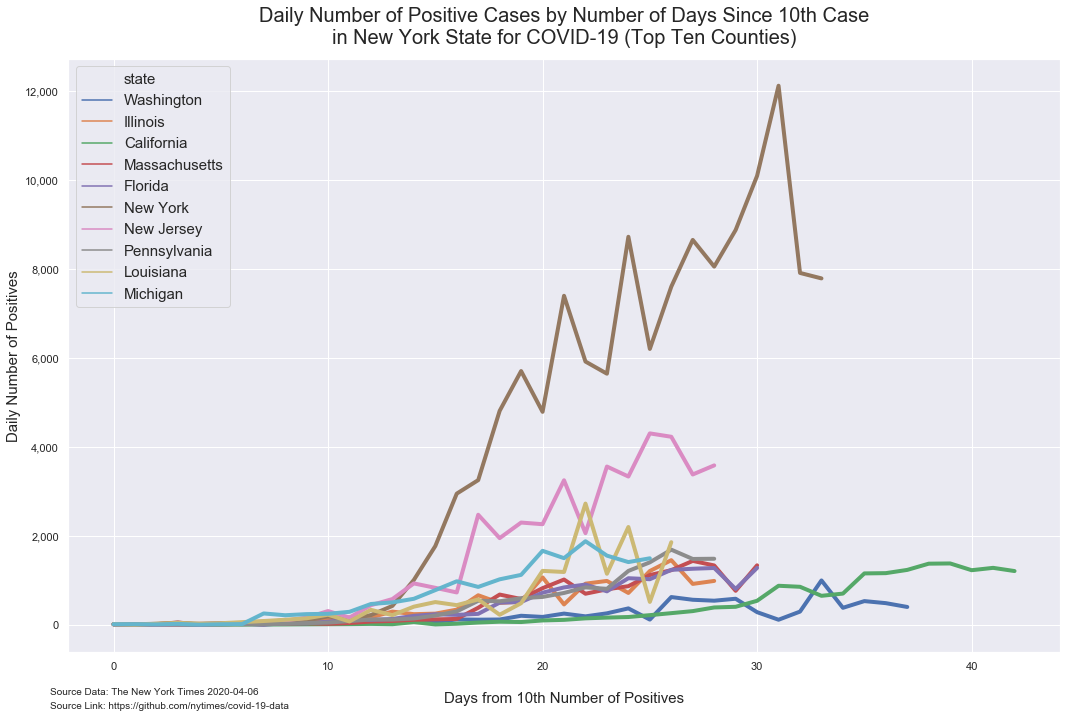

In [52]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="daily_cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
#plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

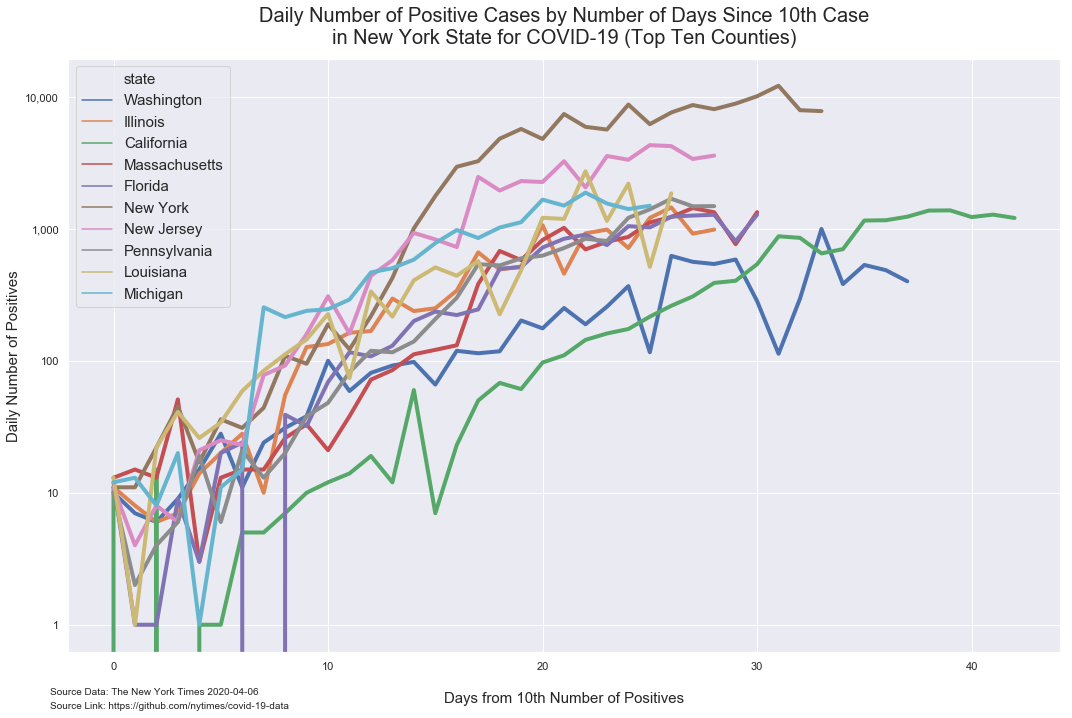

In [53]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="time_difference", y="daily_cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
#plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

In [54]:
state_ten_cases_weekly = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [55]:
state_ten_cases_weekly = state_ten_cases_weekly.set_index('date').groupby('state').resample('W').agg({'time_difference': 
                                                                    np.max, 'daily_cases': np.mean})

In [56]:
state_ten_cases_weekly.reset_index(inplace=True)
state_ten_cases_weekly.rename(columns={'daily_cases': 'daily_cases_week_average'}, inplace=True)

In [57]:
state_ten_cases_weekly

state       date  time_difference  daily_cases_week_average
0      California 2020-03-01                6                  4.714286
1      California 2020-03-08               13                 11.285714
2      California 2020-03-15               20                 52.285714
3      California 2020-03-22               27                196.142857
4      California 2020-03-29               34                630.714286
5      California 2020-04-05               41               1258.571429
6      California 2020-04-12               42               1208.000000
7         Florida 2020-03-08                1                  6.500000
8         Florida 2020-03-15                8                 13.714286
9         Florida 2020-03-22               15                127.285714
10        Florida 2020-03-29               22                563.142857
11        Florida 2020-04-05               29               1057.142857
12        Florida 2020-04-12               30               1279.000000
13       Illinois 2020-03-15                6                 13.428571
14       Illinois 2020-03-22               13                136.142857
15       Illinois 2020-03-29               20                509.428571
16       Illinois 2020-04-05               27                951.857143
17       Illinois 2020-04-12               28                986.000000
18      Louisiana 2020-03-15                4                 20.600000
19      Louisiana 2020-03-22               11                104.857143
20      Louisiana 2020-03-29               18                386.142857
21      Louisiana 2020-04-05               25               1352.857143
22      Louisiana 2020-04-12               26               1857.000000
23  Massachusetts 2020-03-08                1                 14.000000
24  Massachusetts 2020-03-15                8                 19.428571
25  Massachusetts 2020-03-22               15                 68.857143
26  Massachusetts 2020-03-29               22                615.571429
27  Massachusetts 2020-04-05               29               1077.857143
28  Massachusetts 2020-04-12               30               1337.000000
29       Michigan 2020-03-15                3                 13.250000
30       Michigan 2020-03-22               10                140.000000
31       Michigan 2020-03-29               17                636.142857
32       Michigan 2020-04-05               24               1449.857143
33       Michigan 2020-04-12               25               1495.000000
34     New Jersey 2020-03-15                6                 14.000000
35     New Jersey 2020-03-22               13                259.428571
36     New Jersey 2020-03-29               20               1638.857143
37     New Jersey 2020-04-05               27               3445.571429
38     New Jersey 2020-04-12               28               3585.000000
39       New York 2020-03-08                4                 21.200000
40       New York 2020-03-15               11                 89.428571
41       New York 2020-03-22               18               2062.285714
42       New York 2020-03-29               25               6342.857143
43       New York 2020-04-05               32               9049.000000
44       New York 2020-04-12               33               7792.000000
45   Pennsylvania 2020-03-15                6                  9.714286
46   Pennsylvania 2020-03-22               13                 62.285714
47   Pennsylvania 2020-03-29               20                419.571429
48   Pennsylvania 2020-04-05               27               1164.000000
49   Pennsylvania 2020-04-12               28               1485.000000
50     Washington 2020-03-01                1                  8.500000
51     Washington 2020-03-08                8                 17.714286
52     Washington 2020-03-15               15                 76.285714
53     Washington 2020-03-22               22                167.000000
54     Washington 2020-03-29               29       

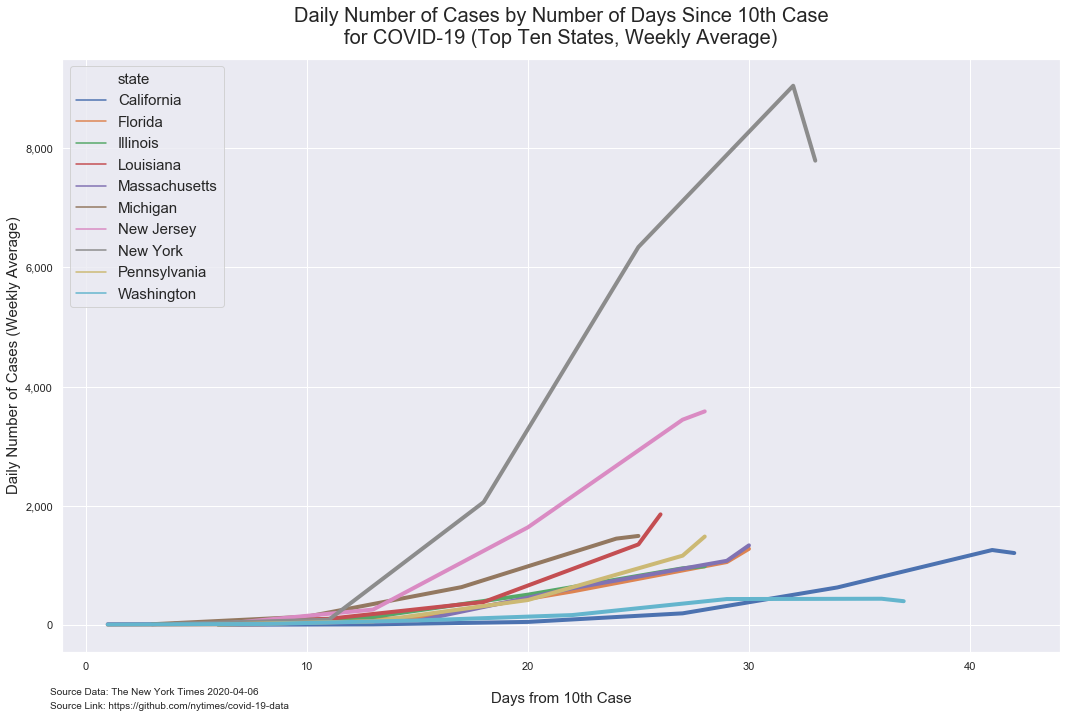

In [58]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="time_difference", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly')

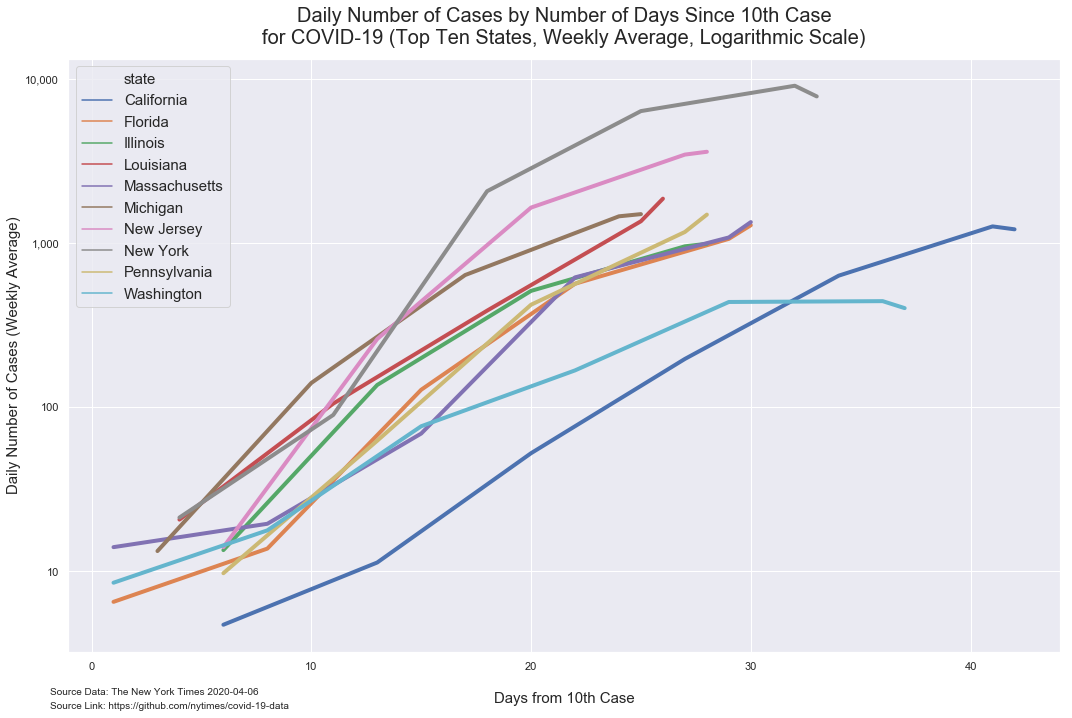

In [59]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 (Top Ten States, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly-log')

In [60]:
growth_rate = state_ten_cases.sort_values(by=['state', 'date', 'cases'], 
                                                ascending=[True, True, True])

In [61]:
growth_rate.head()

date       state  fips  cases  daily_cases  deaths date_ten_case  \
181 2020-02-24  California     6     11         11.0       0    2020-02-24   
182 2020-02-25  California     6     11          0.0       0    2020-02-24   
183 2020-02-26  California     6     26         15.0       0    2020-02-24   
184 2020-02-27  California     6     26          0.0       0    2020-02-24   
185 2020-02-28  California     6     27          1.0       0    2020-02-24   

     time_difference  
181                0  
182                1  
183                2  
184                3  
185                4

In [62]:
growth_rate['growth_rate'] = (growth_rate['daily_cases'] / growth_rate['daily_cases'].shift(1))

In [63]:
growth_rate.head(10)

date       state  fips  cases  daily_cases  deaths date_ten_case  \
181 2020-02-24  California     6     11         11.0       0    2020-02-24   
182 2020-02-25  California     6     11          0.0       0    2020-02-24   
183 2020-02-26  California     6     26         15.0       0    2020-02-24   
184 2020-02-27  California     6     26          0.0       0    2020-02-24   
185 2020-02-28  California     6     27          1.0       0    2020-02-24   
186 2020-02-29  California     6     28          1.0       0    2020-02-24   
187 2020-03-01  California     6     33          5.0       0    2020-02-24   
188 2020-03-02  California     6     38          5.0       0    2020-02-24   
189 2020-03-03  California     6     45          7.0       0    2020-02-24   
190 2020-03-04  California     6     55         10.0       1    2020-02-24   

     time_difference  growth_rate  
181                0          NaN  
182                1     0.000000  
183                2          inf  
184                3     0.000000  
185                4          inf  
186                5     1.000000  
187                6     5.000000  
188                7     1.000000  
189                8     1.400000  
190                9     1.428571

In [64]:
replace = growth_rate['growth_rate'].loc[growth_rate.growth_rate < 0.02]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(replace,  np.NaN)

inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [65]:
growth_rate = growth_rate.dropna(subset=['growth_rate'])

In [66]:
growth_rate.isna().sum()

date               0
state              0
fips               0
cases              0
daily_cases        0
deaths             0
date_ten_case      0
time_difference    0
growth_rate        0
dtype: int64

In [67]:
growth_rate

date       state  fips  cases  daily_cases  deaths date_ten_case  \
186 2020-02-29  California     6     28          1.0       0    2020-02-24   
187 2020-03-01  California     6     33          5.0       0    2020-02-24   
188 2020-03-02  California     6     38          5.0       0    2020-02-24   
189 2020-03-03  California     6     45          7.0       0    2020-02-24   
190 2020-03-04  California     6     55         10.0       1    2020-02-24   
..         ...         ...   ...    ...          ...     ...           ...   
72  2020-04-02  Washington    53   6585        997.0     272    2020-02-29   
73  2020-04-03  Washington    53   6966        381.0     293    2020-02-29   
74  2020-04-04  Washington    53   7498        532.0     318    2020-02-29   
75  2020-04-05  Washington    53   7984        486.0     344    2020-02-29   
76  2020-04-06  Washington    53   8384        400.0     383    2020-02-29   

     time_difference  growth_rate  
186                5     1.000000  
187                6     5.000000  
188                7     1.000000  
189                8     1.400000  
190                9     1.428571  
..               ...          ...  
72                33     3.368243  
73                34     0.382146  
74                35     1.396325  
75                36     0.913534  
76                37     0.823045  

[301 rows x 9 columns]

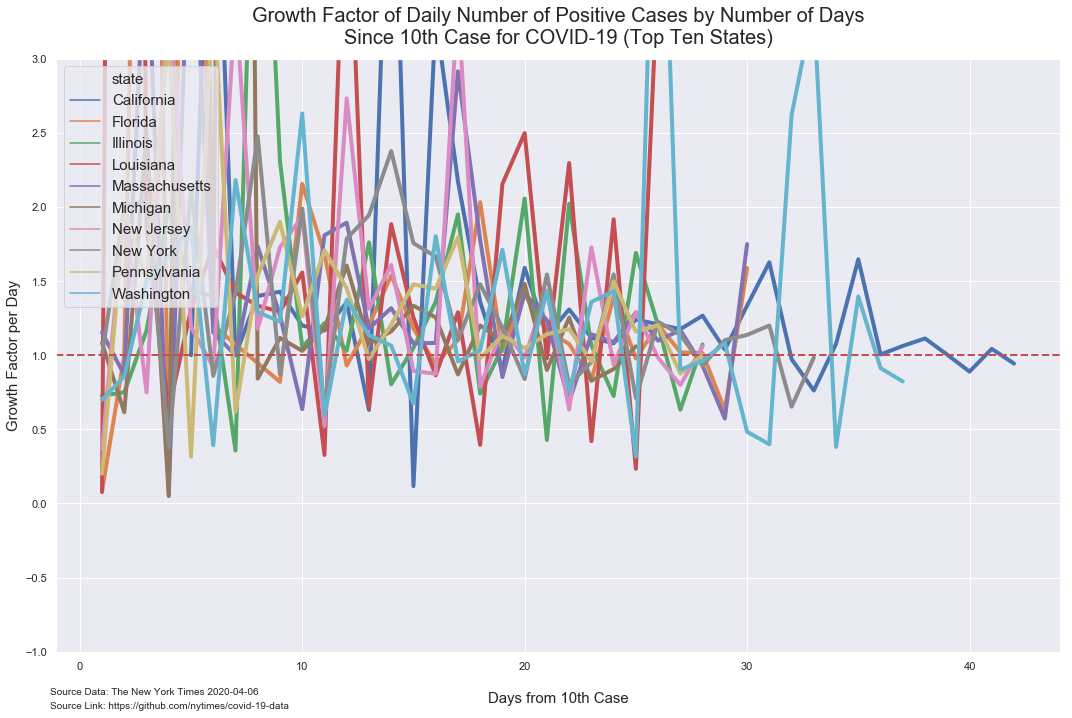

In [68]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="growth_rate",
             hue="state", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(-1, 3)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days\nSince 10th Case for COVID-19 (Top Ten States)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-daily')

In [69]:
growth_rate_weekly = growth_rate.set_index('date').groupby('state').resample('W').agg({'time_difference': 
                                                                    np.max, 'growth_rate': np.mean})

In [70]:
growth_rate_weekly

time_difference  growth_rate
state         date                                    
California    2020-03-01                6     3.000000
              2020-03-08               13     1.169137
              2020-03-15               20     2.060502
              2020-03-22               27     1.181124
              2020-03-29               34     1.154254
              2020-04-05               41     1.109397
              2020-04-12               42     0.943750
Florida       2020-03-08                1     0.083333
              2020-03-15                6     3.640000
              2020-03-22               15     1.358732
              2020-03-29               22     1.250641
              2020-04-05               29     1.010336
              2020-04-12               30     1.588820
Illinois      2020-03-15                6     1.245418
              2020-03-22               13     1.890050
              2020-03-29               20     1.288279
              2020-04-05               27     1.109722
              2020-04-12               28     1.072905
Louisiana     2020-03-15                4     6.143676
              2020-03-22               11     1.282964
              2020-03-29               18     1.551360
              2020-04-05               25     1.500303
              2020-04-12               26     3.612840
Massachusetts 2020-03-08                1     1.153846
              2020-03-15                8     1.867011
              2020-03-22               15     1.312631
              2020-03-29               22     1.424623
              2020-04-05               29     1.041199
              2020-04-12               30     1.750000
Michigan      2020-03-15                3     1.399573
              2020-03-22               10     4.619372
              2020-03-29               17     1.212195
              2020-04-05               24     1.095772
              2020-04-12               25     1.060284
New Jersey    2020-03-15                6     1.454019
              2020-03-22               13     1.829349
              2020-03-29               20     1.390243
              2020-04-05               27     1.115434
              2020-04-12               28     1.060337
New York      2020-03-08                4     1.355808
              2020-03-15               11     1.483132
              2020-03-22               18     1.730523
              2020-03-29               25     1.082940
              2020-04-05               32     1.055362
              2020-04-12               33     0.984460
Pennsylvania  2020-03-15                6     1.780409
              2020-03-22               13     1.350716
              2020-03-29               20     1.298609
              2020-04-05               27     1.145220
              2020-04-12               28     1.003378
Washington    2020-03-01                1     0.700000
              2020-03-08                8     1.393831
              2020-03-15               15     1.242108
              2020-03-22               22     1.222625
              2020-03-29               29     1.631950
              2020-04-05               36     1.366110
              2020-04-12               37     0.823045

In [71]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [72]:
growth_rate_weekly

state       date  time_difference  growth_rate_weekly_average
0      California 2020-03-01                6                    3.000000
1      California 2020-03-08               13                    1.169137
2      California 2020-03-15               20                    2.060502
3      California 2020-03-22               27                    1.181124
4      California 2020-03-29               34                    1.154254
5      California 2020-04-05               41                    1.109397
6      California 2020-04-12               42                    0.943750
7         Florida 2020-03-08                1                    0.083333
8         Florida 2020-03-15                6                    3.640000
9         Florida 2020-03-22               15                    1.358732
10        Florida 2020-03-29               22                    1.250641
11        Florida 2020-04-05               29                    1.010336
12        Florida 2020-04-12               30                    1.588820
13       Illinois 2020-03-15                6                    1.245418
14       Illinois 2020-03-22               13                    1.890050
15       Illinois 2020-03-29               20                    1.288279
16       Illinois 2020-04-05               27                    1.109722
17       Illinois 2020-04-12               28                    1.072905
18      Louisiana 2020-03-15                4                    6.143676
19      Louisiana 2020-03-22               11                    1.282964
20      Louisiana 2020-03-29               18                    1.551360
21      Louisiana 2020-04-05               25                    1.500303
22      Louisiana 2020-04-12               26                    3.612840
23  Massachusetts 2020-03-08                1                    1.153846
24  Massachusetts 2020-03-15                8                    1.867011
25  Massachusetts 2020-03-22               15                    1.312631
26  Massachusetts 2020-03-29               22                    1.424623
27  Massachusetts 2020-04-05               29                    1.041199
28  Massachusetts 2020-04-12               30                    1.750000
29       Michigan 2020-03-15                3                    1.399573
30       Michigan 2020-03-22               10                    4.619372
31       Michigan 2020-03-29               17                    1.212195
32       Michigan 2020-04-05               24                    1.095772
33       Michigan 2020-04-12               25                    1.060284
34     New Jersey 2020-03-15                6                    1.454019
35     New Jersey 2020-03-22               13                    1.829349
36     New Jersey 2020-03-29               20                    1.390243
37     New Jersey 2020-04-05               27                    1.115434
38     New Jersey 2020-04-12               28                    1.060337
39       New York 2020-03-08                4                    1.355808
40       New York 2020-03-15               11                    1.483132
41       New York 2020-03-22               18                    1.730523
42       New York 2020-03-29               25                    1.082940
43       New York 2020-04-05               32                    1.055362
44       New York 2020-04-12               33                    0.984460
45   Pennsylvania 2020-03-15                6                    1.780409
46   Pennsylvania 2020-03-22               13                    1.350716
47   Pennsylvania 2020-03-29               20                    1.298609
48   Pennsylvania 2020-04-05               27                    1.145220
49   Pennsylvania 2020-04-12               28                    1.003378
50     Washington 2020-03-01                1                    0.700000
51     Washington 2020-03-08                8                    1.393831
52     Washington 2020-03-15               15                    1.242108
53     Washingto

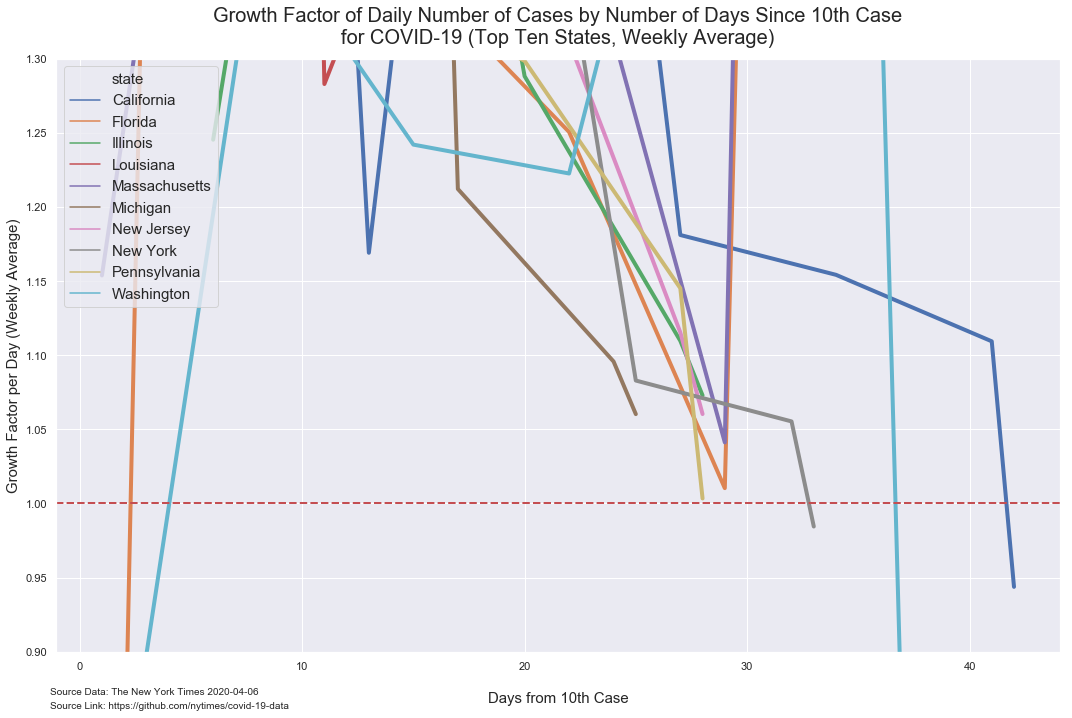

In [73]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="growth_rate_weekly_average",
             hue="state", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.9, 1.3)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-weekly')

In [74]:
trajectory_top_states_growth_rate = state_ten_cases.sort_values(by=['state', 'date', 'cases'], 
                                              ascending=[True, True, True])

In [75]:
trajectory_top_states_growth_rate.head(25)

date       state  fips  cases  daily_cases  deaths date_ten_case  \
181 2020-02-24  California     6     11         11.0       0    2020-02-24   
182 2020-02-25  California     6     11          0.0       0    2020-02-24   
183 2020-02-26  California     6     26         15.0       0    2020-02-24   
184 2020-02-27  California     6     26          0.0       0    2020-02-24   
185 2020-02-28  California     6     27          1.0       0    2020-02-24   
186 2020-02-29  California     6     28          1.0       0    2020-02-24   
187 2020-03-01  California     6     33          5.0       0    2020-02-24   
188 2020-03-02  California     6     38          5.0       0    2020-02-24   
189 2020-03-03  California     6     45          7.0       0    2020-02-24   
190 2020-03-04  California     6     55         10.0       1    2020-02-24   
191 2020-03-05  California     6     67         12.0       1    2020-02-24   
192 2020-03-06  California     6     81         14.0       1    2020-02-24   
193 2020-03-07  California     6    100         19.0       1    2020-02-24   
194 2020-03-08  California     6    112         12.0       1    2020-02-24   
195 2020-03-09  California     6    172         60.0       2    2020-02-24   
196 2020-03-10  California     6    179          7.0       3    2020-02-24   
197 2020-03-11  California     6    202         23.0       4    2020-02-24   
198 2020-03-12  California     6    252         50.0       4    2020-02-24   
199 2020-03-13  California     6    320         68.0       5    2020-02-24   
200 2020-03-14  California     6    381         61.0       5    2020-02-24   
201 2020-03-15  California     6    478         97.0       6    2020-02-24   
202 2020-03-16  California     6    588        110.0      11    2020-02-24   
203 2020-03-17  California     6    732        144.0      14    2020-02-24   
204 2020-03-18  California     6    893        161.0      17    2020-02-24   
205 2020-03-19  California     6   1067        174.0      19    2020-02-24   

     time_difference  
181                0  
182                1  
183                2  
184                3  
185                4  
186                5  
187                6  
188                7  
189                8  
190                9  
191               10  
192               11  
193               12  
194               13  
195               14  
196               15  
197               16  
198               17  
199               18  
200               19  
201               20  
202               21  
203               22  
204               23  
205               24

In [76]:
trajectory_top_states_growth_rate['growth_rate'] = (trajectory_top_states_growth_rate.cases / 
                                               trajectory_top_states_growth_rate.cases.shift(1))

In [77]:
trajectory_top_states_growth_rate.head(25)

date       state  fips  cases  daily_cases  deaths date_ten_case  \
181 2020-02-24  California     6     11         11.0       0    2020-02-24   
182 2020-02-25  California     6     11          0.0       0    2020-02-24   
183 2020-02-26  California     6     26         15.0       0    2020-02-24   
184 2020-02-27  California     6     26          0.0       0    2020-02-24   
185 2020-02-28  California     6     27          1.0       0    2020-02-24   
186 2020-02-29  California     6     28          1.0       0    2020-02-24   
187 2020-03-01  California     6     33          5.0       0    2020-02-24   
188 2020-03-02  California     6     38          5.0       0    2020-02-24   
189 2020-03-03  California     6     45          7.0       0    2020-02-24   
190 2020-03-04  California     6     55         10.0       1    2020-02-24   
191 2020-03-05  California     6     67         12.0       1    2020-02-24   
192 2020-03-06  California     6     81         14.0       1    2020-02-24   
193 2020-03-07  California     6    100         19.0       1    2020-02-24   
194 2020-03-08  California     6    112         12.0       1    2020-02-24   
195 2020-03-09  California     6    172         60.0       2    2020-02-24   
196 2020-03-10  California     6    179          7.0       3    2020-02-24   
197 2020-03-11  California     6    202         23.0       4    2020-02-24   
198 2020-03-12  California     6    252         50.0       4    2020-02-24   
199 2020-03-13  California     6    320         68.0       5    2020-02-24   
200 2020-03-14  California     6    381         61.0       5    2020-02-24   
201 2020-03-15  California     6    478         97.0       6    2020-02-24   
202 2020-03-16  California     6    588        110.0      11    2020-02-24   
203 2020-03-17  California     6    732        144.0      14    2020-02-24   
204 2020-03-18  California     6    893        161.0      17    2020-02-24   
205 2020-03-19  California     6   1067        174.0      19    2020-02-24   

     time_difference  growth_rate  
181                0          NaN  
182                1     1.000000  
183                2     2.363636  
184                3     1.000000  
185                4     1.038462  
186                5     1.037037  
187                6     1.178571  
188                7     1.151515  
189                8     1.184211  
190                9     1.222222  
191               10     1.218182  
192               11     1.208955  
193               12     1.234568  
194               13     1.120000  
195               14     1.535714  
196               15     1.040698  
197               16     1.128492  
198               17     1.247525  
199               18     1.269841  
200               19     1.190625  
201               20     1.254593  
202               21     1.230126  
203               22     1.244898  
204               23     1.219945  
205               24     1.194849

In [78]:
trajectory_top_states_growth_rate = trajectory_top_states_growth_rate.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False], ).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [79]:
trajectory_top_states_growth_rate.growth_rate = trajectory_top_states_growth_rate.growth_rate.round(2)

In [80]:
trajectory_top_states_growth_rate

date          state  fips   cases  daily_cases  deaths date_ten_case  \
0 2020-04-06       New York    36  130703       7792.0    4758    2020-03-04   
1 2020-04-06     New Jersey    34   41090       3585.0    1005    2020-03-09   
2 2020-04-06       Michigan    26   17130       1495.0     727    2020-03-12   
3 2020-04-06     California     6   16284       1208.0     386    2020-02-24   
4 2020-04-06      Louisiana    22   14867       1857.0     512    2020-03-11   
5 2020-04-06  Massachusetts    25   13837       1337.0     260    2020-03-07   
6 2020-04-06        Florida    12   13621       1279.0     253    2020-03-07   
7 2020-04-06   Pennsylvania    42   13074       1485.0     169    2020-03-09   
8 2020-04-06       Illinois    17   12262        986.0     309    2020-03-09   
9 2020-04-06     Washington    53    8384        400.0     383    2020-02-29   

   time_difference  growth_rate  
0               33         1.06  
1               28         1.10  
2               25         1.10  
3               42         1.08  
4               26         1.14  
5               30         1.11  
6               30         1.10  
7               28         1.13  
8               28         1.09  
9               37         1.05

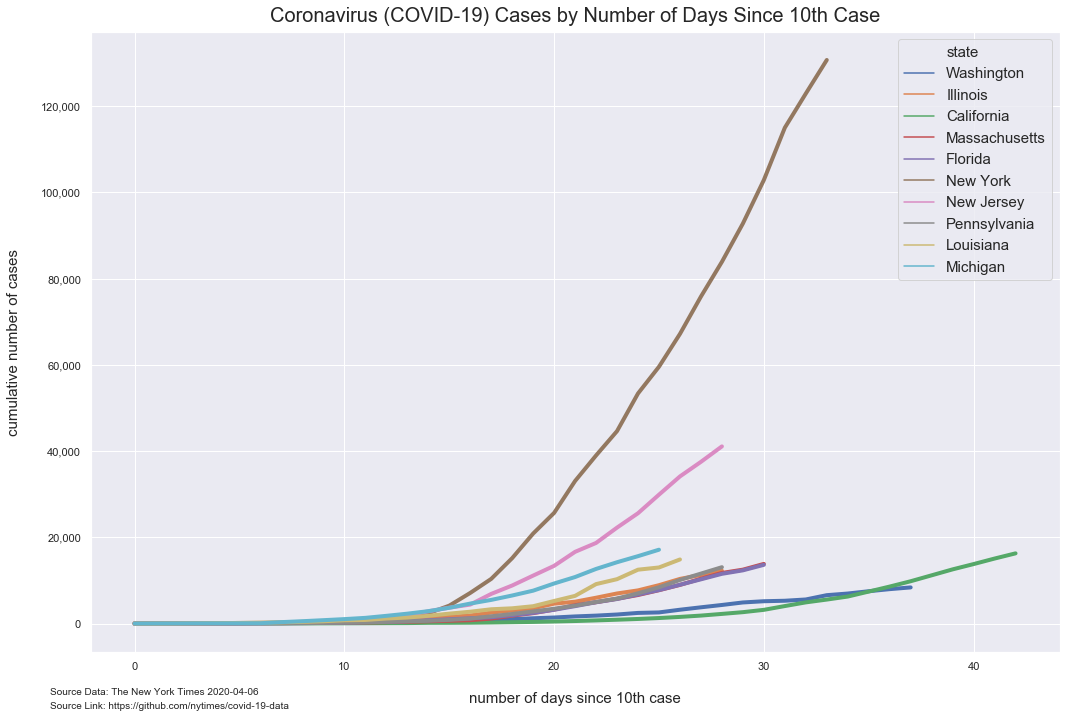

In [81]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

# sns.scatterplot(x="time_difference", y="cases", 
#                 data=trajectory_top_states_growth_rate, s=100, ax=ax1, color='red')

# x = trajectory_top_states_growth_rate.cases
# z = trajectory_top_states_growth_rate.time_difference
# n = trajectory_top_states_growth_rate.growth_rate
# for i, label in enumerate(n):
#     ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)
# #ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 10th case', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 10th Case', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case')

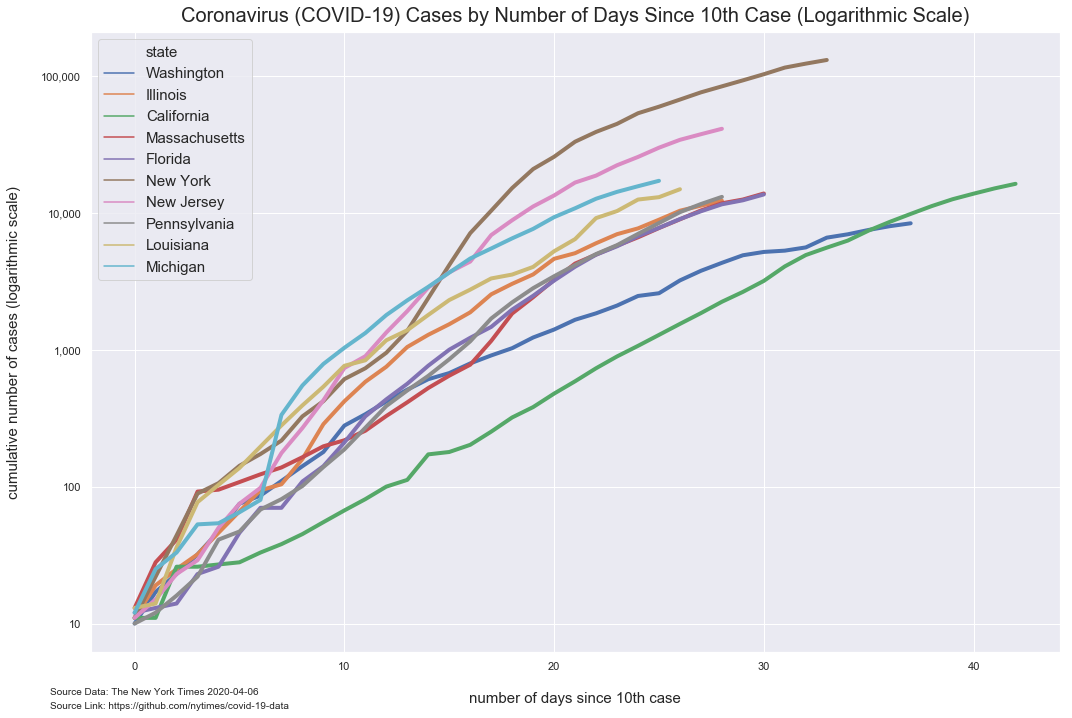

In [82]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

# sns.scatterplot(x="time_difference", y="cases", 
#                 data=trajectory_top_states_growth_rate, s=100, ax=ax1, color='red')

# x = trajectory_top_states_growth_rate.cases
# z = trajectory_top_states_growth_rate.time_difference
# n = trajectory_top_states_growth_rate.growth_rate
# for i, label in enumerate(n):
#     ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)
    
ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 10th case', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 10th Case (Logarithmic Scale)', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case-log')

In [83]:
from_ten_cases = covid_19_state_data.loc[covid_19_state_data['cases'] >= 10]

In [84]:
from_ten_cases = from_ten_cases.sort_values(by=['date', 'cases'], 
                                ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [85]:
from_ten_cases = from_ten_cases[['state', 'date']]
from_ten_cases.rename(columns={'date': 'ten_cases_date'}, inplace=True)

In [86]:
from_ten_cases

state ten_cases_date
0               Nebraska     2020-02-17
1                  Texas     2020-02-24
2             California     2020-02-24
3             Washington     2020-02-29
4               New York     2020-03-04
5                Florida     2020-03-07
6          Massachusetts     2020-03-07
7                Georgia     2020-03-08
8                 Oregon     2020-03-08
9           Pennsylvania     2020-03-09
10              Illinois     2020-03-09
11            New Jersey     2020-03-09
12              Colorado     2020-03-09
13                  Iowa     2020-03-10
14  District of Columbia     2020-03-11
15        South Carolina     2020-03-11
16              Virginia     2020-03-11
17               Indiana     2020-03-11
18             Louisiana     2020-03-11
19              Maryland     2020-03-11
20              Kentucky     2020-03-12
21                Nevada     2020-03-12
22              Michigan     2020-03-12
23        North Carolina     2020-03-12
24             Tennessee     2020-03-12
25            New Mexico     2020-03-13
26           Connecticut     2020-03-13
27                  Ohio     2020-03-13
28             Minnesota     2020-03-13
29             Wisconsin     2020-03-13
30          Rhode Island     2020-03-13
31               Alabama     2020-03-14
32               Arizona     2020-03-14
33                  Utah     2020-03-14
34           Mississippi     2020-03-15
35                 Maine     2020-03-15
36         New Hampshire     2020-03-15
37              Arkansas     2020-03-15
38                Hawaii     2020-03-16
39              Oklahoma     2020-03-16
40          South Dakota     2020-03-16
41               Wyoming     2020-03-16
42                Kansas     2020-03-16
43               Vermont     2020-03-16
44              Delaware     2020-03-17
45              Missouri     2020-03-17
46                 Idaho     2020-03-18
47               Montana     2020-03-18
48                Alaska     2020-03-19
49                  Guam     2020-03-19
50          North Dakota     2020-03-19
51           Puerto Rico     2020-03-20
52         West Virginia     2020-03-21
53        Virgin Islands     2020-03-22

In [87]:
from_ten_cases = covid_19_state_data.merge(from_ten_cases, left_on='state', right_on='state')

In [88]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['cases'] >= 10]

In [89]:
from_ten_cases

date          state  fips  cases  deaths ten_cases_date
39   2020-02-29     Washington    53     10       1     2020-02-29
40   2020-03-01     Washington    53     17       3     2020-02-29
41   2020-03-02     Washington    53     23       6     2020-02-29
42   2020-03-03     Washington    53     32      10     2020-02-29
43   2020-03-04     Washington    53     47      11     2020-02-29
...         ...            ...   ...    ...     ...            ...
1924 2020-04-02  West Virginia    54    217       2     2020-03-21
1925 2020-04-03  West Virginia    54    242       2     2020-03-21
1926 2020-04-04  West Virginia    54    282       2     2020-03-21
1927 2020-04-05  West Virginia    54    324       3     2020-03-21
1928 2020-04-06  West Virginia    54    345       4     2020-03-21

[1402 rows x 6 columns]

In [90]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['date'] - 
                                      from_ten_cases['ten_cases_date']).dt.days

In [91]:
from_ten_cases

date          state  fips  cases  deaths ten_cases_date  \
39   2020-02-29     Washington    53     10       1     2020-02-29   
40   2020-03-01     Washington    53     17       3     2020-02-29   
41   2020-03-02     Washington    53     23       6     2020-02-29   
42   2020-03-03     Washington    53     32      10     2020-02-29   
43   2020-03-04     Washington    53     47      11     2020-02-29   
...         ...            ...   ...    ...     ...            ...   
1924 2020-04-02  West Virginia    54    217       2     2020-03-21   
1925 2020-04-03  West Virginia    54    242       2     2020-03-21   
1926 2020-04-04  West Virginia    54    282       2     2020-03-21   
1927 2020-04-05  West Virginia    54    324       3     2020-03-21   
1928 2020-04-06  West Virginia    54    345       4     2020-03-21   

      days_from_10_cases  
39                     0  
40                     1  
41                     2  
42                     3  
43                     4  
...                  ...  
1924                  12  
1925                  13  
1926                  14  
1927                  15  
1928                  16  

[1402 rows x 7 columns]

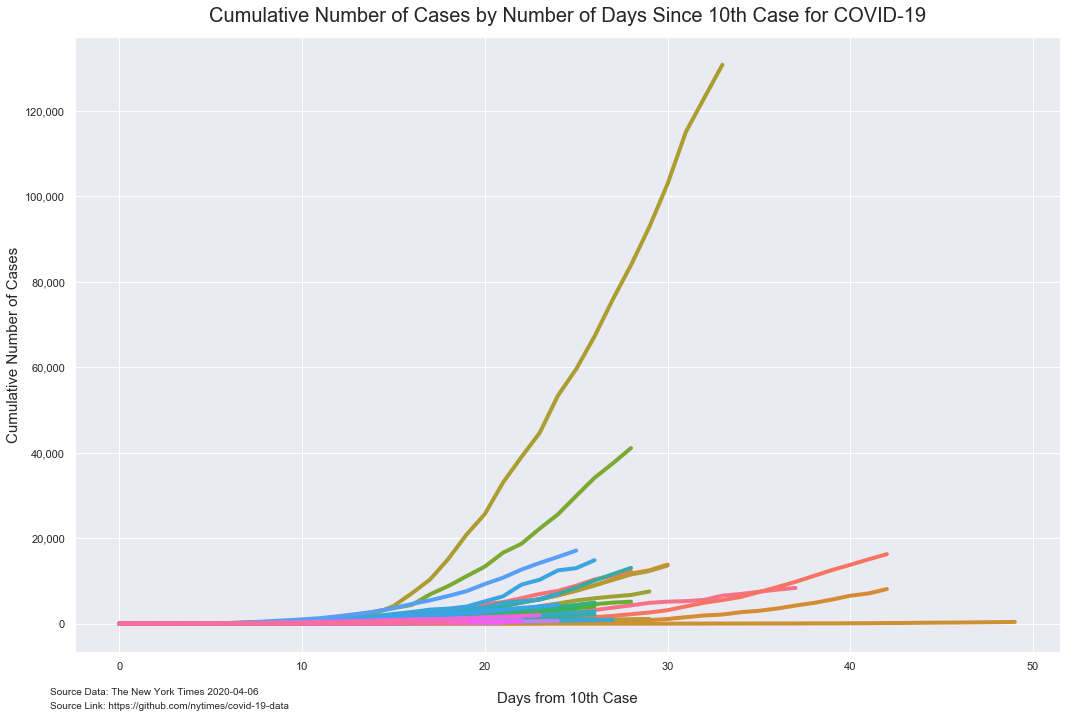

In [92]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state')

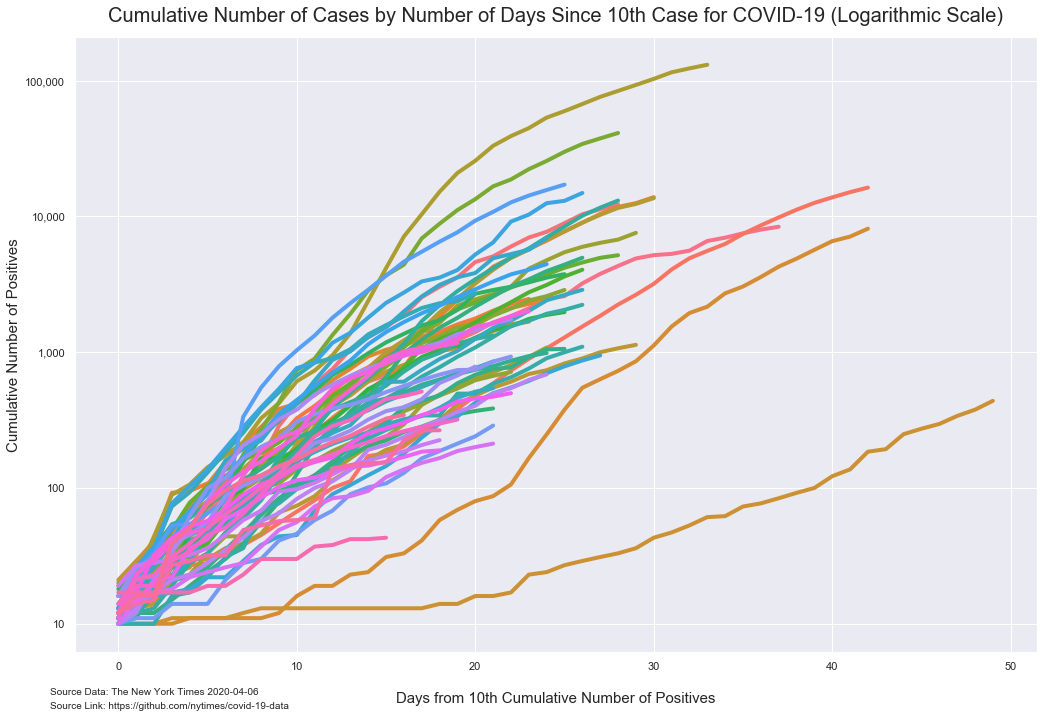

In [93]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-log')

In [94]:
trajectory_plot = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [95]:
trajectory_plot['cases_diff'] = trajectory_plot['cases'].diff()

In [96]:
trajectory_plot.head(50)

date       state  fips  cases  daily_cases  deaths date_ten_case  \
181 2020-02-24  California     6     11         11.0       0    2020-02-24   
182 2020-02-25  California     6     11          0.0       0    2020-02-24   
183 2020-02-26  California     6     26         15.0       0    2020-02-24   
184 2020-02-27  California     6     26          0.0       0    2020-02-24   
185 2020-02-28  California     6     27          1.0       0    2020-02-24   
186 2020-02-29  California     6     28          1.0       0    2020-02-24   
187 2020-03-01  California     6     33          5.0       0    2020-02-24   
188 2020-03-02  California     6     38          5.0       0    2020-02-24   
189 2020-03-03  California     6     45          7.0       0    2020-02-24   
190 2020-03-04  California     6     55         10.0       1    2020-02-24   
191 2020-03-05  California     6     67         12.0       1    2020-02-24   
192 2020-03-06  California     6     81         14.0       1    2020-02-24   
193 2020-03-07  California     6    100         19.0       1    2020-02-24   
194 2020-03-08  California     6    112         12.0       1    2020-02-24   
195 2020-03-09  California     6    172         60.0       2    2020-02-24   
196 2020-03-10  California     6    179          7.0       3    2020-02-24   
197 2020-03-11  California     6    202         23.0       4    2020-02-24   
198 2020-03-12  California     6    252         50.0       4    2020-02-24   
199 2020-03-13  California     6    320         68.0       5    2020-02-24   
200 2020-03-14  California     6    381         61.0       5    2020-02-24   
201 2020-03-15  California     6    478         97.0       6    2020-02-24   
202 2020-03-16  California     6    588        110.0      11    2020-02-24   
203 2020-03-17  California     6    732        144.0      14    2020-02-24   
204 2020-03-18  California     6    893        161.0      17    2020-02-24   
205 2020-03-19  California     6   1067        174.0      19    2020-02-24   
206 2020-03-20  California     6   1283        216.0      24    2020-02-24   
207 2020-03-21  California     6   1544        261.0      28    2020-02-24   
208 2020-03-22  California     6   1851        307.0      35    2020-02-24   
209 2020-03-23  California     6   2240        389.0      39    2020-02-24   
210 2020-03-24  California     6   2644        404.0      52    2020-02-24   
211 2020-03-25  California     6   3183        539.0      67    2020-02-24   
212 2020-03-26  California     6   4060        877.0      82    2020-02-24   
213 2020-03-27  California     6   4914        854.0     102    2020-02-24   
214 2020-03-28  California     6   5565        651.0     121    2020-02-24   
215 2020-03-29  California     6   6266        701.0     130    2020-02-24   
216 2020-03-30  California     6   7421       1155.0     146    2020-02-24   
217 2020-03-31  California     6   8582       1161.0     183    2020-02-24   
218 2020-04-01  California     6   9816       1234.0     212    2020-02-24   
219 2020-04-02  California     6  11190       1374.0     247    2020-02-24   
220 2020-04-03  California     6  12569       1379.0     282    2020-02-24   
221 2020-04-04  California     6  13796       1227.0     323    2020-02-24   
222 2020-04-05  California     6  15076       1280.0     349    2020-02-24   
223 2020-04-06  California     6  16284       1208.0     386    2020-02-24   
296 2020-03-07     Florida    12     12         12.0       2    2020-03-07   
297 2020-03-08     Florida    12     13          1.0       2    2020-03-07   
298 2020-03-09     Florida    12     14          1.0       2    2020-03-07   
299 2020-03-10     Florida    12     23          9.0       2    2020-03-07   
300 2020-03-11     Florida    12     26          3.0       2    2020-03-07   
301 2020-03-12     Florida    12     46         20.0       2    2020-03-07   
302 2020-03-13     Florida    12     70         24.0       2    2020-03-07   

     time_difference  cases_dif

In [97]:
trajectory_plot.shape

(317, 9)

In [98]:
trajectory_plot['cases_diff'].loc[trajectory_plot.cases_diff < 0] = 0
trajectory_plot = trajectory_plot.fillna(0)

In [99]:
trajectory_plot.head(50)

date       state  fips  cases  daily_cases  deaths date_ten_case  \
181 2020-02-24  California     6     11         11.0       0    2020-02-24   
182 2020-02-25  California     6     11          0.0       0    2020-02-24   
183 2020-02-26  California     6     26         15.0       0    2020-02-24   
184 2020-02-27  California     6     26          0.0       0    2020-02-24   
185 2020-02-28  California     6     27          1.0       0    2020-02-24   
186 2020-02-29  California     6     28          1.0       0    2020-02-24   
187 2020-03-01  California     6     33          5.0       0    2020-02-24   
188 2020-03-02  California     6     38          5.0       0    2020-02-24   
189 2020-03-03  California     6     45          7.0       0    2020-02-24   
190 2020-03-04  California     6     55         10.0       1    2020-02-24   
191 2020-03-05  California     6     67         12.0       1    2020-02-24   
192 2020-03-06  California     6     81         14.0       1    2020-02-24   
193 2020-03-07  California     6    100         19.0       1    2020-02-24   
194 2020-03-08  California     6    112         12.0       1    2020-02-24   
195 2020-03-09  California     6    172         60.0       2    2020-02-24   
196 2020-03-10  California     6    179          7.0       3    2020-02-24   
197 2020-03-11  California     6    202         23.0       4    2020-02-24   
198 2020-03-12  California     6    252         50.0       4    2020-02-24   
199 2020-03-13  California     6    320         68.0       5    2020-02-24   
200 2020-03-14  California     6    381         61.0       5    2020-02-24   
201 2020-03-15  California     6    478         97.0       6    2020-02-24   
202 2020-03-16  California     6    588        110.0      11    2020-02-24   
203 2020-03-17  California     6    732        144.0      14    2020-02-24   
204 2020-03-18  California     6    893        161.0      17    2020-02-24   
205 2020-03-19  California     6   1067        174.0      19    2020-02-24   
206 2020-03-20  California     6   1283        216.0      24    2020-02-24   
207 2020-03-21  California     6   1544        261.0      28    2020-02-24   
208 2020-03-22  California     6   1851        307.0      35    2020-02-24   
209 2020-03-23  California     6   2240        389.0      39    2020-02-24   
210 2020-03-24  California     6   2644        404.0      52    2020-02-24   
211 2020-03-25  California     6   3183        539.0      67    2020-02-24   
212 2020-03-26  California     6   4060        877.0      82    2020-02-24   
213 2020-03-27  California     6   4914        854.0     102    2020-02-24   
214 2020-03-28  California     6   5565        651.0     121    2020-02-24   
215 2020-03-29  California     6   6266        701.0     130    2020-02-24   
216 2020-03-30  California     6   7421       1155.0     146    2020-02-24   
217 2020-03-31  California     6   8582       1161.0     183    2020-02-24   
218 2020-04-01  California     6   9816       1234.0     212    2020-02-24   
219 2020-04-02  California     6  11190       1374.0     247    2020-02-24   
220 2020-04-03  California     6  12569       1379.0     282    2020-02-24   
221 2020-04-04  California     6  13796       1227.0     323    2020-02-24   
222 2020-04-05  California     6  15076       1280.0     349    2020-02-24   
223 2020-04-06  California     6  16284       1208.0     386    2020-02-24   
296 2020-03-07     Florida    12     12         12.0       2    2020-03-07   
297 2020-03-08     Florida    12     13          1.0       2    2020-03-07   
298 2020-03-09     Florida    12     14          1.0       2    2020-03-07   
299 2020-03-10     Florida    12     23          9.0       2    2020-03-07   
300 2020-03-11     Florida    12     26          3.0       2    2020-03-07   
301 2020-03-12     Florida    12     46         20.0       2    2020-03-07   
302 2020-03-13     Florida    12     70         24.0       2    2020-03-07   

     time_difference  cases_dif

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


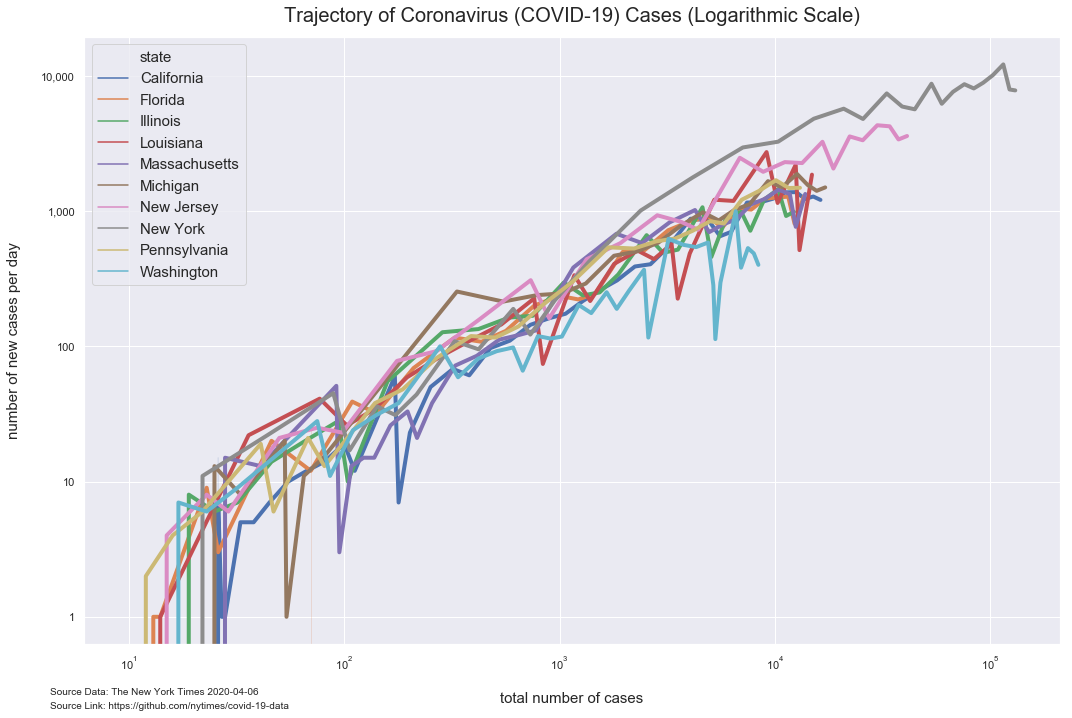

In [100]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff",
             hue="state",
             data=trajectory_plot, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases per day', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-daily-plot')

In [101]:
trajectory_plot_weekly = trajectory_plot[['state', 'date', 'cases', 'cases_diff']]

In [102]:
trajectory_plot_weekly.head()

state       date  cases  cases_diff
181  California 2020-02-24     11         0.0
182  California 2020-02-25     11         0.0
183  California 2020-02-26     26        15.0
184  California 2020-02-27     26         0.0
185  California 2020-02-28     27         1.0

In [103]:
trajectory_plot_weekly = trajectory_plot.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 'cases_diff': np.mean})

In [104]:
trajectory_plot_weekly

cases   cases_diff
state         date                           
California    2020-03-01      33     3.142857
              2020-03-08     112    11.285714
              2020-03-15     478    52.285714
              2020-03-22    1851   196.142857
              2020-03-29    6266   630.714286
              2020-04-05   15076  1258.571429
              2020-04-12   16284  1208.000000
Florida       2020-03-08      13     0.500000
              2020-03-15     109    13.714286
              2020-03-22    1000   127.285714
              2020-03-29    4942   563.142857
              2020-04-05   12342  1057.142857
              2020-04-12   13621  1279.000000
Illinois      2020-03-15      94    11.857143
              2020-03-22    1047   136.142857
              2020-03-29    4613   509.428571
              2020-04-05   11276   951.857143
              2020-04-12   12262   986.000000
Louisiana     2020-03-15     103    18.000000
              2020-03-22     837   104.857143
              2020-03-29    3540   386.142857
              2020-04-05   13010  1352.857143
              2020-04-12   14867  1857.000000
Massachusetts 2020-03-08      28     7.500000
              2020-03-15     164    19.428571
              2020-03-22     646    68.857143
              2020-03-29    4955   615.571429
              2020-04-05   12500  1077.857143
              2020-04-12   13837  1337.000000
Michigan      2020-03-15      53    10.250000
              2020-03-22    1033   140.000000
              2020-03-29    5486   636.142857
              2020-04-05   15635  1449.857143
              2020-04-12   17130  1495.000000
New Jersey    2020-03-15      98    12.428571
              2020-03-22    1914   259.428571
              2020-03-29   13386  1638.857143
              2020-04-05   37505  3445.571429
              2020-04-12   41090  3585.000000
New York      2020-03-08     106    19.000000
              2020-03-15     732    89.428571
              2020-03-22   15168  2062.285714
              2020-03-29   59568  6342.857143
              2020-04-05  122911  9049.000000
              2020-04-12  130703  7792.000000
Pennsylvania  2020-03-15      68     8.285714
              2020-03-22     504    62.285714
              2020-03-29    3441   419.571429
              2020-04-05   11589  1164.000000
              2020-04-12   13074  1485.000000
Washington    2020-03-01      17     3.500000
              2020-03-08     141    17.714286
              2020-03-15     675    76.285714
              2020-03-22    1844   167.000000
              2020-03-29    4896   436.000000
              2020-04-05    7984   441.142857
              2020-04-12    8384   400.000000

In [105]:
trajectory_plot_weekly.reset_index(inplace=True)
trajectory_plot_weekly.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

In [106]:
trajectory_plot_weekly

state       date   cases  cases_diff_week_avg
0      California 2020-03-01      33             3.142857
1      California 2020-03-08     112            11.285714
2      California 2020-03-15     478            52.285714
3      California 2020-03-22    1851           196.142857
4      California 2020-03-29    6266           630.714286
5      California 2020-04-05   15076          1258.571429
6      California 2020-04-12   16284          1208.000000
7         Florida 2020-03-08      13             0.500000
8         Florida 2020-03-15     109            13.714286
9         Florida 2020-03-22    1000           127.285714
10        Florida 2020-03-29    4942           563.142857
11        Florida 2020-04-05   12342          1057.142857
12        Florida 2020-04-12   13621          1279.000000
13       Illinois 2020-03-15      94            11.857143
14       Illinois 2020-03-22    1047           136.142857
15       Illinois 2020-03-29    4613           509.428571
16       Illinois 2020-04-05   11276           951.857143
17       Illinois 2020-04-12   12262           986.000000
18      Louisiana 2020-03-15     103            18.000000
19      Louisiana 2020-03-22     837           104.857143
20      Louisiana 2020-03-29    3540           386.142857
21      Louisiana 2020-04-05   13010          1352.857143
22      Louisiana 2020-04-12   14867          1857.000000
23  Massachusetts 2020-03-08      28             7.500000
24  Massachusetts 2020-03-15     164            19.428571
25  Massachusetts 2020-03-22     646            68.857143
26  Massachusetts 2020-03-29    4955           615.571429
27  Massachusetts 2020-04-05   12500          1077.857143
28  Massachusetts 2020-04-12   13837          1337.000000
29       Michigan 2020-03-15      53            10.250000
30       Michigan 2020-03-22    1033           140.000000
31       Michigan 2020-03-29    5486           636.142857
32       Michigan 2020-04-05   15635          1449.857143
33       Michigan 2020-04-12   17130          1495.000000
34     New Jersey 2020-03-15      98            12.428571
35     New Jersey 2020-03-22    1914           259.428571
36     New Jersey 2020-03-29   13386          1638.857143
37     New Jersey 2020-04-05   37505          3445.571429
38     New Jersey 2020-04-12   41090          3585.000000
39       New York 2020-03-08     106            19.000000
40       New York 2020-03-15     732            89.428571
41       New York 2020-03-22   15168          2062.285714
42       New York 2020-03-29   59568          6342.857143
43       New York 2020-04-05  122911          9049.000000
44       New York 2020-04-12  130703          7792.000000
45   Pennsylvania 2020-03-15      68             8.285714
46   Pennsylvania 2020-03-22     504            62.285714
47   Pennsylvania 2020-03-29    3441           419.571429
48   Pennsylvania 2020-04-05   11589          1164.000000
49   Pennsylvania 2020-04-12   13074          1485.000000
50     Washington 2020-03-01      17             3.500000
51     Washington 2020-03-08     141            17.714286
52     Washington 2020-03-15     675            76.285714
53     Washington 2020-03-22    1844           167.000000
54     Washington 2020-03-29    4896           436.000000
55     Washington 2020-04-05    7984           441.142857
56     Washington 2020-04-12    8384           400.000000

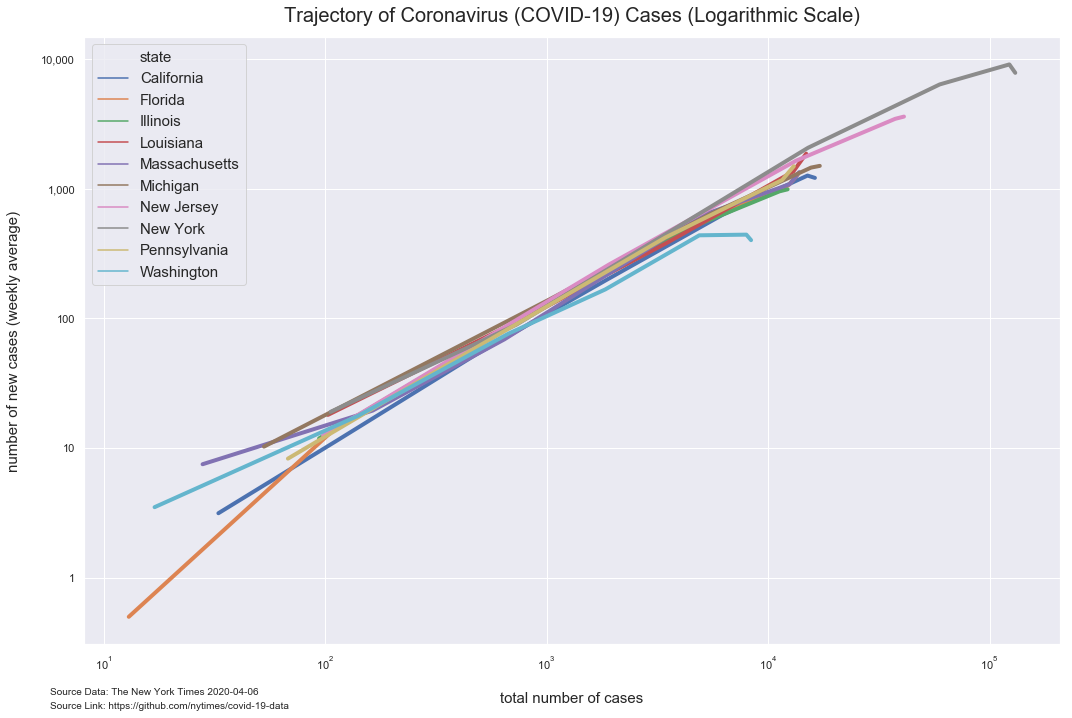

In [107]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_plot_weekly, linewidth=4)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-weekly-plot')

In [108]:
trajectory_all_states = covid_19_state_data.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [109]:
trajectory_all_states

date    state  fips  cases  deaths
586  2020-03-13  Alabama     1      6       0
637  2020-03-14  Alabama     1     12       0
689  2020-03-15  Alabama     1     23       0
742  2020-03-16  Alabama     1     29       0
795  2020-03-17  Alabama     1     39       0
...         ...      ...   ...    ...     ...
1718 2020-04-02  Wyoming    56    153       0
1773 2020-04-03  Wyoming    56    166       0
1828 2020-04-04  Wyoming    56    187       0
1883 2020-04-05  Wyoming    56    200       0
1938 2020-04-06  Wyoming    56    212       0

[1939 rows x 5 columns]

In [110]:
trajectory_all_states['cases_diff'] = trajectory_all_states['cases'].diff()
trajectory_all_states['cases_diff'].loc[trajectory_all_states.cases_diff < 0] = 0
trajectory_all_states = trajectory_all_states.fillna(0)
trajectory_all_states = trajectory_all_states.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                                    'cases_diff': np.mean})
trajectory_all_states.reset_index(inplace=True)
trajectory_all_states.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

In [111]:
trajectory_all_states.head()

state       date  cases  cases_diff_week_avg
0  Alabama 2020-03-15     23             5.666667
1  Alabama 2020-03-22    157            19.142857
2  Alabama 2020-03-29    830            96.142857
3  Alabama 2020-04-05   1841           144.428571
4  Alabama 2020-04-12   2006           165.000000

In [112]:
print(trajectory_all_states.loc[trajectory_all_states.cases_diff_week_avg < 1])

print(len(trajectory_all_states.loc[trajectory_all_states.cases_diff_week_avg < 1]))

         state       date  cases  cases_diff_week_avg
5       Alaska 2020-03-15      1                  0.0
10     Arizona 2020-01-26      1                  0.0
11     Arizona 2020-02-02      1                  0.0
12     Arizona 2020-02-09      1                  0.0
13     Arizona 2020-02-16      1                  0.0
..         ...        ...    ...                  ...
336  Wisconsin 2020-02-16      1                  0.0
337  Wisconsin 2020-02-23      1                  0.0
338  Wisconsin 2020-03-01      1                  0.0
339  Wisconsin 2020-03-08      1                  0.0
345    Wyoming 2020-03-15      3                  0.4

[76 rows x 4 columns]
76


In [113]:
trajectory_all_states = trajectory_all_states.loc[trajectory_all_states.cases_diff_week_avg > 0]

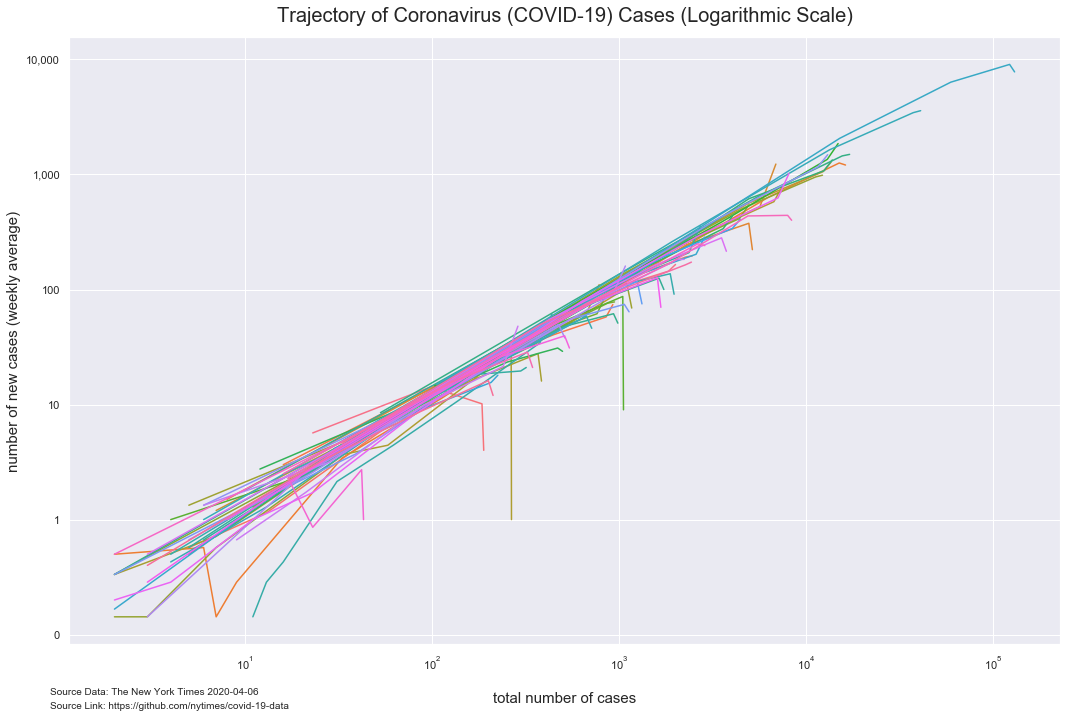

In [114]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_all_states)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot')

In [115]:
trajectory_all_states_scatter = trajectory_all_states.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False], ).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [116]:
trajectory_all_states_scatter

state       date   cases  cases_diff_week_avg
0                   New York 2020-04-12  130703          7792.000000
1                 New Jersey 2020-04-12   41090          3585.000000
2                   Michigan 2020-04-12   17130          1495.000000
3                 California 2020-04-12   16284          1208.000000
4                  Louisiana 2020-04-12   14867          1857.000000
5              Massachusetts 2020-04-12   13837          1337.000000
6                    Florida 2020-04-12   13621          1279.000000
7               Pennsylvania 2020-04-12   13074          1485.000000
8                   Illinois 2020-04-12   12262           986.000000
9                 Washington 2020-04-12    8384           400.000000
10                     Texas 2020-04-12    8115          1021.000000
11                   Georgia 2020-04-12    7558           816.000000
12               Connecticut 2020-04-12    6906          1231.000000
13                  Colorado 2020-04-12    5172           222.000000
14                   Indiana 2020-04-12    4956           545.000000
15                      Ohio 2020-04-12    4450           407.000000
16                  Maryland 2020-04-12    4045           436.000000
17                 Tennessee 2020-04-12    3753           215.000000
18                  Virginia 2020-04-12    2878           241.000000
19            North Carolina 2020-04-12    2870           285.000000
20                  Missouri 2020-04-12    2722           355.000000
21                   Arizona 2020-04-12    2465           196.000000
22                 Wisconsin 2020-04-12    2440           173.000000
23            South Carolina 2020-04-12    2232           183.000000
24                   Alabama 2020-04-12    2006           165.000000
25                    Nevada 2020-04-12    1971            91.000000
26               Mississippi 2020-04-12    1738           100.000000
27                      Utah 2020-04-12    1675            70.000000
28                  Oklahoma 2020-04-12    1327            75.000000
29                     Idaho 2020-04-12    1170            69.000000
30                    Oregon 2020-04-12    1132            64.000000
31      District of Columbia 2020-04-12    1097            99.000000
32              Rhode Island 2020-04-12    1082           160.000000
33                  Kentucky 2020-04-12    1057             9.000000
34                 Minnesota 2020-04-12     986            51.000000
35                      Iowa 2020-04-12     946            78.000000
36                  Arkansas 2020-04-12     927            74.000000
37                    Kansas 2020-04-12     853            90.000000
38                  Delaware 2020-04-12     783           110.000000
39             New Hampshire 2020-04-12     715            46.000000
40                New Mexico 2020-04-12     686            62.000000
41                   Vermont 2020-04-12     543            31.000000
42               Puerto Rico 2020-04-12     513            38.000000
43                     Maine 2020-04-12     499            29.000000
44                  Nebraska 2020-04-12     438            61.000000
45                    Hawaii 2020-04-12     385            16.000000
46             West Virginia 2020-04-12     345            21.000000
47                   Montana 2020-04-12     319            21.000000
48              South Dakota 2020-04-12     288            48.000000
49                      Guam 2020-04-12     266             1.000000
50              North Dakota 2020-04-12     225            18.000000
51                   Wyoming 2020-04-12     212            12.000000
52                    Alaska 2020-04-12     189             4.000000
53            Virgin Islands 2020-04-12      43             1.000000
54  Northern Mariana Islands 2020-04-05       8             0.857143

In [117]:
len(trajectory_all_states_scatter)

55

In [118]:
print(list(trajectory_all_states_scatter.state))

['New York', 'New Jersey', 'Michigan', 'California', 'Louisiana', 'Massachusetts', 'Florida', 'Pennsylvania', 'Illinois', 'Washington', 'Texas', 'Georgia', 'Connecticut', 'Colorado', 'Indiana', 'Ohio', 'Maryland', 'Tennessee', 'Virginia', 'North Carolina', 'Missouri', 'Arizona', 'Wisconsin', 'South Carolina', 'Alabama', 'Nevada', 'Mississippi', 'Utah', 'Oklahoma', 'Idaho', 'Oregon', 'District of Columbia', 'Rhode Island', 'Kentucky', 'Minnesota', 'Iowa', 'Arkansas', 'Kansas', 'Delaware', 'New Hampshire', 'New Mexico', 'Vermont', 'Puerto Rico', 'Maine', 'Nebraska', 'Hawaii', 'West Virginia', 'Montana', 'South Dakota', 'Guam', 'North Dakota', 'Wyoming', 'Alaska', 'Virgin Islands', 'Northern Mariana Islands']


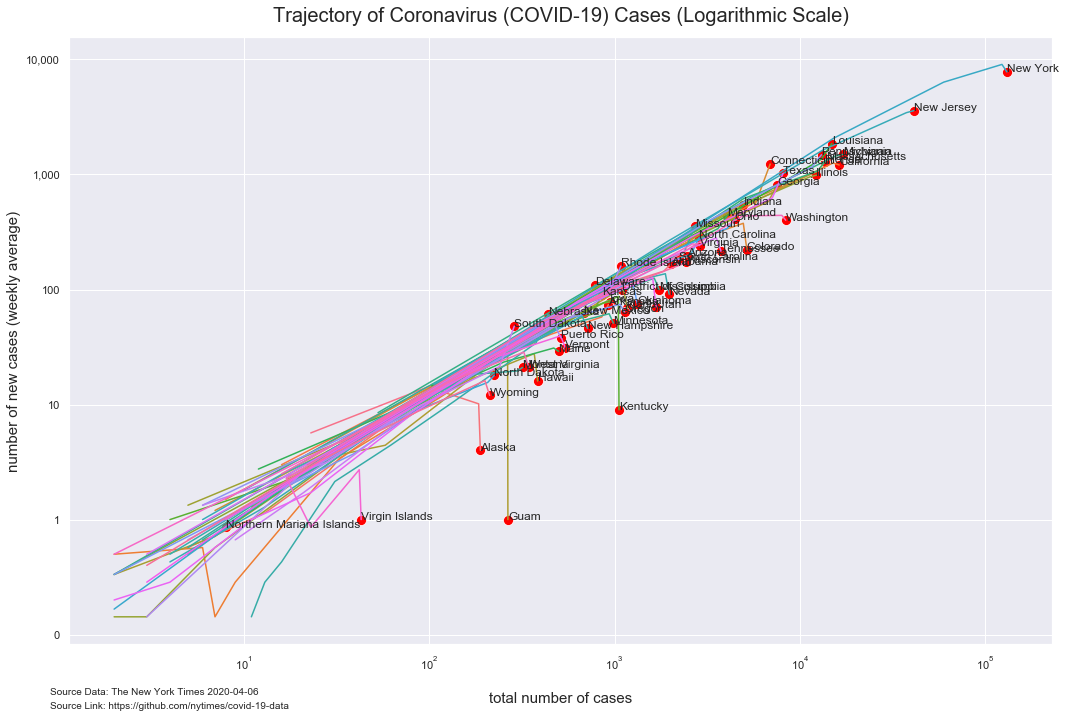

In [119]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="cases_diff_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.cases_diff_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels')

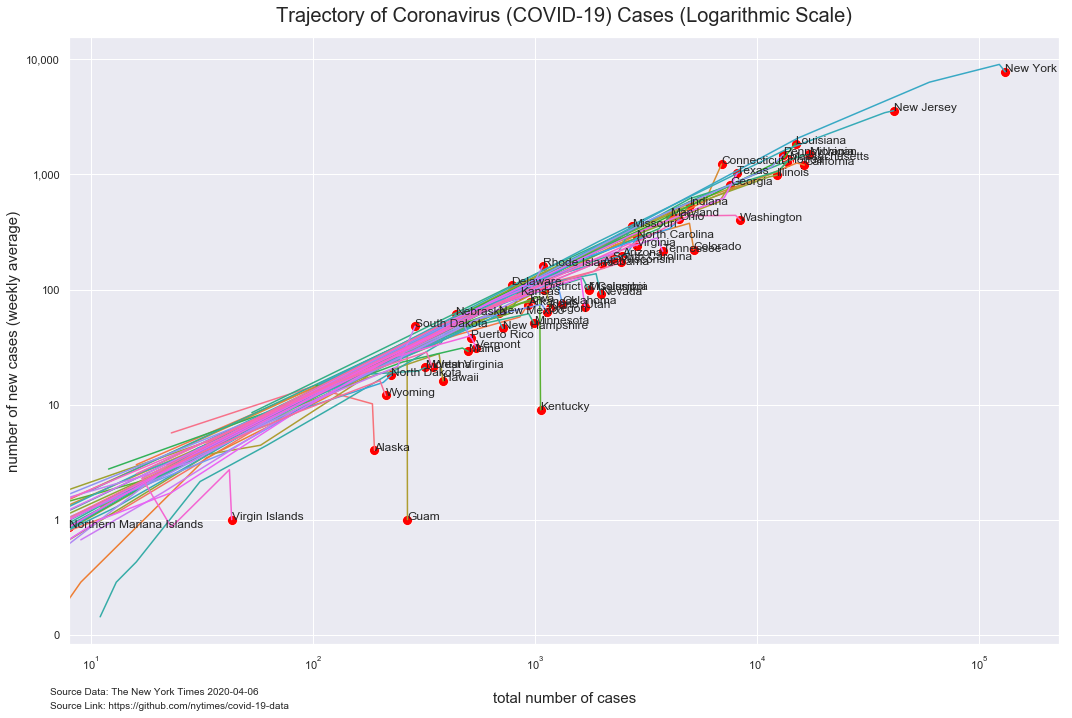

In [120]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="cases_diff_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.cases_diff_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

limit = int(trajectory_all_states_scatter.sort_values(by='cases').cases.iloc[0])
ax1.set_xlim(left=limit)


ax1.legend_.remove()
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels-xlimit')

In [121]:
g = covid_19_state_data.groupby('date')['cases'].sum().reset_index()

g.set_index('date', drop=False, inplace=True)

g.index = pd.to_datetime(g.index, infer_datetime_format=True)

In [122]:
g.index.dtype

dtype('<M8[ns]')

In [123]:
g.head()

date  cases
date                        
2020-01-21 2020-01-21      1
2020-01-22 2020-01-22      1
2020-01-23 2020-01-23      1
2020-01-24 2020-01-24      2
2020-01-25 2020-01-25      3

In [124]:
g.tail()

date   cases
date                         
2020-04-02 2020-04-02  244423
2020-04-03 2020-04-03  276501
2020-04-04 2020-04-04  311536
2020-04-05 2020-04-05  336774
2020-04-06 2020-04-06  366238

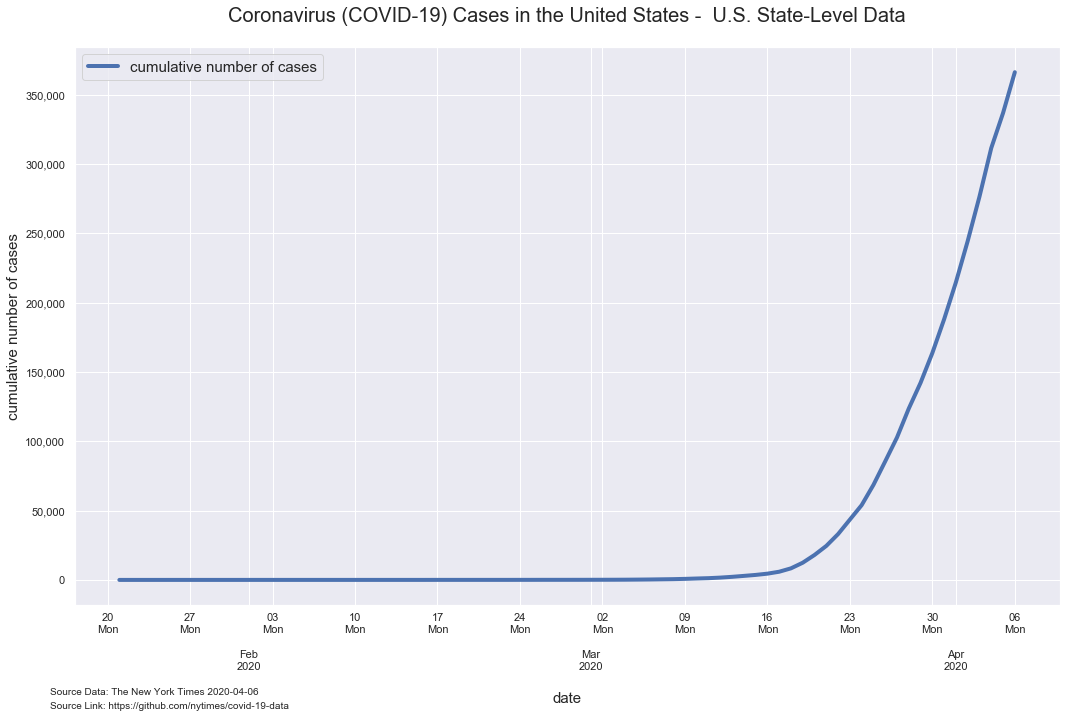

In [125]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax1.plot(g['cases'], linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.set_ylabel('cumulative number of cases', fontsize=15)

ax1.grid(True)
ax1.grid(which='minor')

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
plt.title('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-linear')

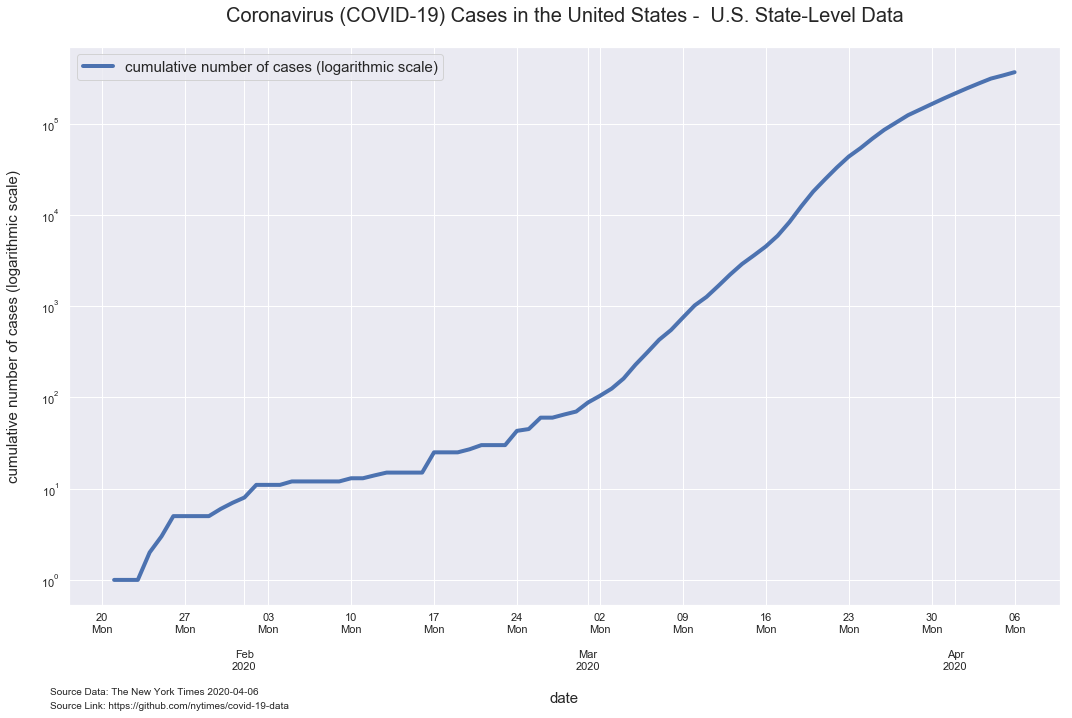

In [126]:
fig, ax2 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax2.plot(g['cases'], linewidth=4)

ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, labelpad = 20)

ax2.grid(True)
ax2.grid(which='minor', axis='x')

ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=0, fontsize=15)
plt.title('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

ax2.set_yscale('log')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-log')

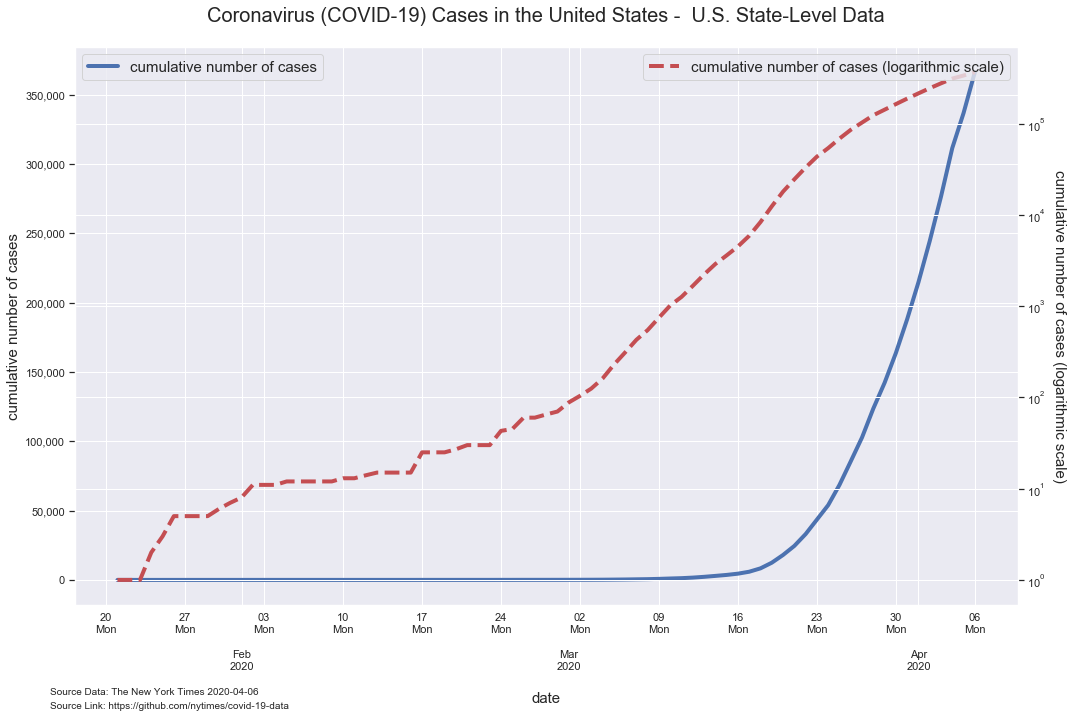

In [127]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)

# Plot 2
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')

ax1.grid(True)
ax1.grid(which='minor')
ax2.tick_params(axis='both', which='minor', length=0)
plt.setp(ax2.get_yticklabels(), visible=True)

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)
plt.title('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-overlay')

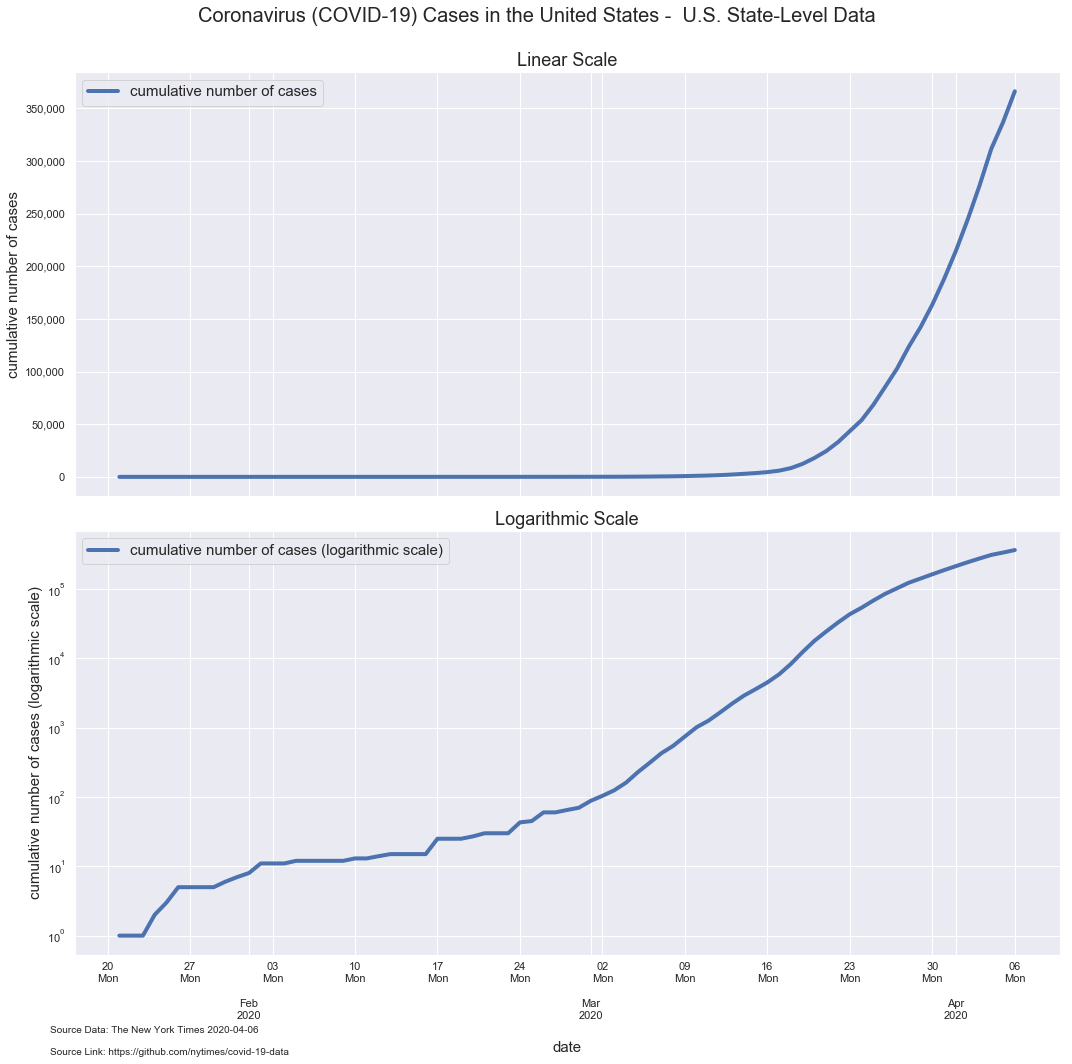

In [128]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(15,15))
fig.suptitle('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')

# Plot 2
ax2.plot(g['cases'], linewidth=4)
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax2.grid(True)
ax2.grid(which='minor', axis='x')

# Formatting Figure
ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=15)
ax1.set_title('Linear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax2.set_yscale('log')

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('figures/nyt-covid-19-data-2-subplots')

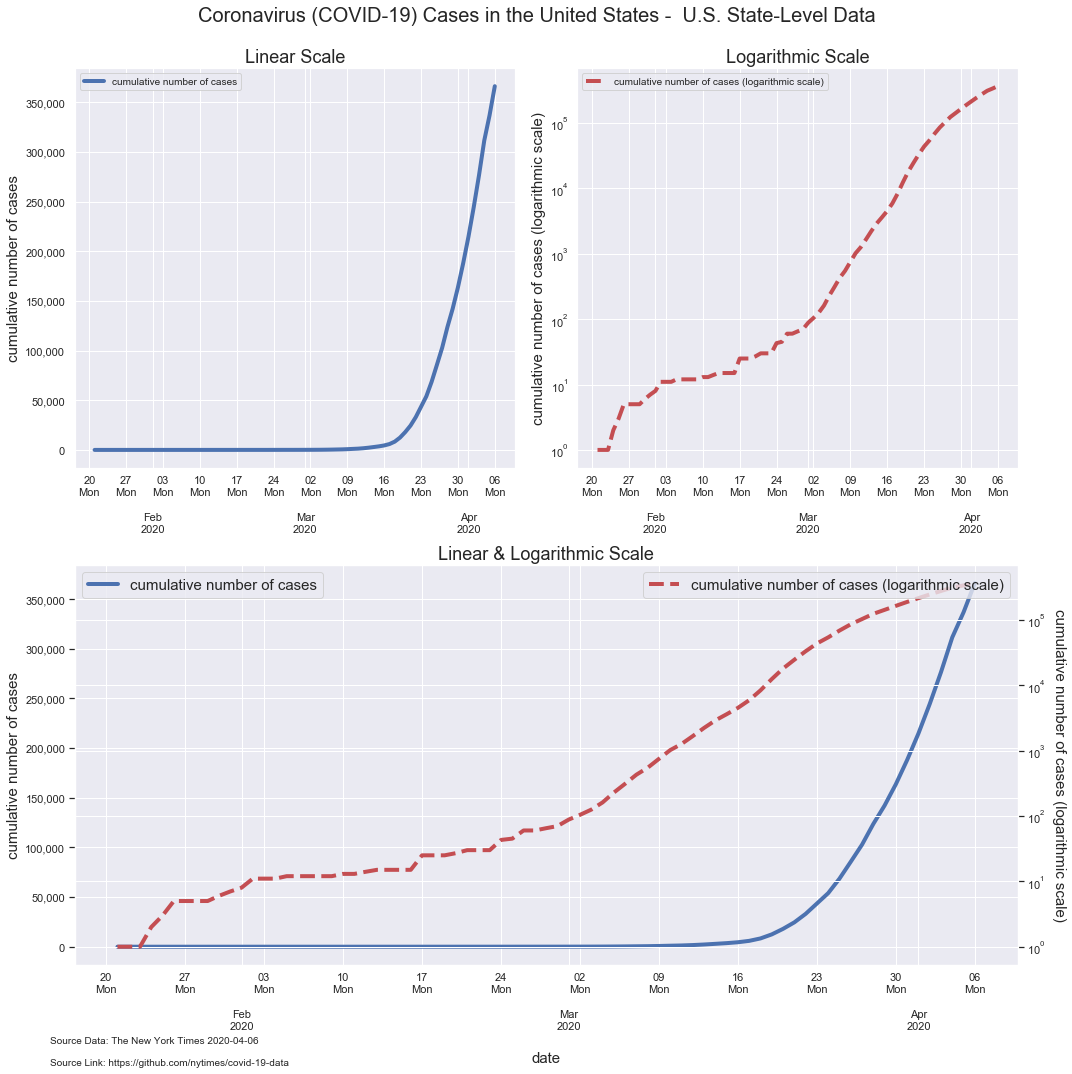

In [129]:
fig, [ax1, ax2, ax3, ax3_1] = plt.subplots(4, 1, sharex=True, figsize=(15,15))
fig.suptitle('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', y = .99, fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax3 = plt.subplot(212)
ax3.plot(g['cases'], linewidth=4)
ax3.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3.set_xlabel('Date', fontsize=15, labelpad = 20)
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3_1 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax3_1.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax3_1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3_1.xaxis.grid(True, which="major")
ax3_1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3_1.set_yscale('log')

ax3.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax3.xaxis.grid(True, which="major")
ax3.xaxis.set_major_locator(dates.MonthLocator())
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Plot 2
ax1 = plt.subplot(221)
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))


# Plot 3
ax2 = plt.subplot(222)
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')
ax2.grid(True)
ax2.grid(which='minor', axis='x')
ax3.grid(True)
ax3.grid(which='minor')
ax3_1.grid(True)
ax3_1.grid(which='minor', axis='x')
ax3_1.tick_params(axis='both', which='minor', length=0)

# Setting Labels
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax3.set_ylabel('cumulative number of cases', fontsize=15)
ax3.set_xlabel('date', fontsize=15, labelpad = 20)
ax3_1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')
ax2.get_yaxis().set_visible(True)
ax3_1.get_yaxis().set_visible(True)
ax3_1.set_yscale('log')
ax3_1.get_yaxis().set_visible(True)

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax3.set_title('Linear & Logarithmic Scale', fontsize=18)

# Setting Legends
ax1.legend(['cumulative number of cases'], loc=2, fontsize=10)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=10)
ax3.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax3_1.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-3-subplots')

In [130]:
g['cases_diff'] = g['cases'].diff()
g = g.fillna(0)

In [131]:
g.head(20)

date  cases  cases_diff
date                                    
2020-01-21 2020-01-21      1         0.0
2020-01-22 2020-01-22      1         0.0
2020-01-23 2020-01-23      1         0.0
2020-01-24 2020-01-24      2         1.0
2020-01-25 2020-01-25      3         1.0
2020-01-26 2020-01-26      5         2.0
2020-01-27 2020-01-27      5         0.0
2020-01-28 2020-01-28      5         0.0
2020-01-29 2020-01-29      5         0.0
2020-01-30 2020-01-30      6         1.0
2020-01-31 2020-01-31      7         1.0
2020-02-01 2020-02-01      8         1.0
2020-02-02 2020-02-02     11         3.0
2020-02-03 2020-02-03     11         0.0
2020-02-04 2020-02-04     11         0.0
2020-02-05 2020-02-05     12         1.0
2020-02-06 2020-02-06     12         0.0
2020-02-07 2020-02-07     12         0.0
2020-02-08 2020-02-08     12         0.0
2020-02-09 2020-02-09     12         0.0

In [132]:
g[50:100]

date   cases  cases_diff
date                                     
2020-03-11 2020-03-11    1263       245.0
2020-03-12 2020-03-12    1668       405.0
2020-03-13 2020-03-13    2224       556.0
2020-03-14 2020-03-14    2898       674.0
2020-03-15 2020-03-15    3600       702.0
2020-03-16 2020-03-16    4507       907.0
2020-03-17 2020-03-17    5905      1398.0
2020-03-18 2020-03-18    8345      2440.0
2020-03-19 2020-03-19   12413      4068.0
2020-03-20 2020-03-20   17996      5583.0
2020-03-21 2020-03-21   24532      6536.0
2020-03-22 2020-03-22   33061      8529.0
2020-03-23 2020-03-23   43499     10438.0
2020-03-24 2020-03-24   53938     10439.0
2020-03-25 2020-03-25   68537     14599.0
2020-03-26 2020-03-26   85533     16996.0
2020-03-27 2020-03-27  102766     17233.0
2020-03-28 2020-03-28  123619     20853.0
2020-03-29 2020-03-29  142194     18575.0
2020-03-30 2020-03-30  163683     21489.0
2020-03-31 2020-03-31  188049     24366.0
2020-04-01 2020-04-01  214711     26662.0
2020-04-02 2020-04-02  244423     29712.0
2020-04-03 2020-04-03  276501     32078.0
2020-04-04 2020-04-04  311536     35035.0
2020-04-05 2020-04-05  336774     25238.0
2020-04-06 2020-04-06  366238     29464.0

In [133]:
g_weekly = g.set_index('date').resample('W').agg({'cases': np.max, 'cases_diff': np.mean})

In [134]:
g_weekly

cases    cases_diff
date                            
2020-01-26       5      0.666667
2020-02-02      11      0.857143
2020-02-09      12      0.142857
2020-02-16      15      0.428571
2020-02-23      30      2.142857
2020-03-01      88      8.285714
2020-03-08     547     65.571429
2020-03-15    3600    436.142857
2020-03-22   33061   4208.714286
2020-03-29  142194  15590.428571
2020-04-05  336774  27797.142857
2020-04-12  366238  29464.000000

In [135]:
g_weekly.reset_index(inplace=True)
g_weekly.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

In [136]:
g_weekly

date   cases  cases_diff_week_avg
0  2020-01-26       5             0.666667
1  2020-02-02      11             0.857143
2  2020-02-09      12             0.142857
3  2020-02-16      15             0.428571
4  2020-02-23      30             2.142857
5  2020-03-01      88             8.285714
6  2020-03-08     547            65.571429
7  2020-03-15    3600           436.142857
8  2020-03-22   33061          4208.714286
9  2020-03-29  142194         15590.428571
10 2020-04-05  336774         27797.142857
11 2020-04-12  366238         29464.000000

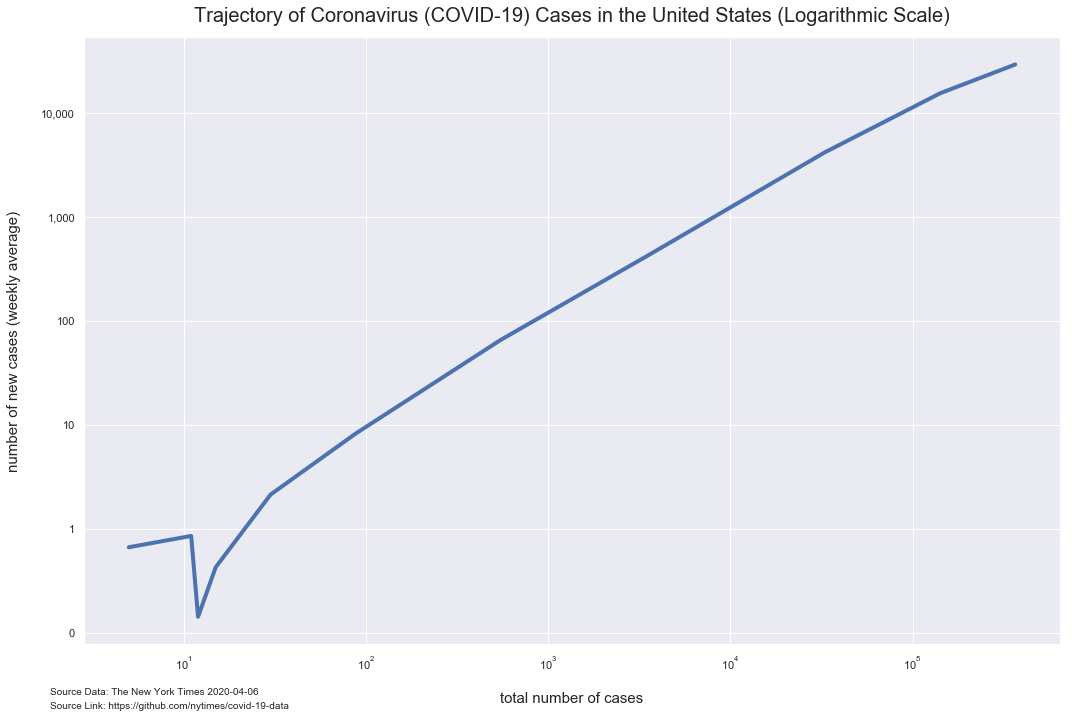

In [137]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg", data=g_weekly, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases in the United States (Logarithmic Scale)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-usa-trajectory-weekly-plot')

In [138]:
covid_19_state_data

date          state  fips  cases  deaths
0    2020-01-21     Washington    53      1       0
1    2020-01-22     Washington    53      1       0
2    2020-01-23     Washington    53      1       0
3    2020-01-24       Illinois    17      1       0
4    2020-01-24     Washington    53      1       0
...         ...            ...   ...    ...     ...
1934 2020-04-06       Virginia    51   2878      54
1935 2020-04-06     Washington    53   8384     383
1936 2020-04-06  West Virginia    54    345       4
1937 2020-04-06      Wisconsin    55   2440      83
1938 2020-04-06        Wyoming    56    212       0

[1939 rows x 5 columns]

In [139]:
# dropping ALL duplicate values 
state_current_cases = covid_19_state_data.sort_values(by = 'date', 
                    ascending=False).drop_duplicates(
                    subset ="state", keep = 'first')

In [140]:
state_current_cases.head()

date        state  fips  cases  deaths
1938 2020-04-06      Wyoming    56    212       0
1911 2020-04-06      Montana    30    319       6
1909 2020-04-06  Mississippi    28   1738      51
1908 2020-04-06    Minnesota    27    986      30
1907 2020-04-06     Michigan    26  17130     727

In [141]:
state_current_cases.state.value_counts()

Maryland                    1
Arizona                     1
Connecticut                 1
West Virginia               1
Wisconsin                   1
Alaska                      1
Hawaii                      1
Washington                  1
Rhode Island                1
Louisiana                   1
California                  1
Virginia                    1
North Dakota                1
Illinois                    1
Utah                        1
Georgia                     1
Oregon                      1
Ohio                        1
Iowa                        1
Delaware                    1
Puerto Rico                 1
Michigan                    1
Nebraska                    1
Virgin Islands              1
Florida                     1
Montana                     1
Kentucky                    1
New York                    1
Tennessee                   1
Texas                       1
South Carolina              1
Maine                       1
Kansas                      1
Arkansas  

In [142]:
state_current_cases.loc[state_current_cases.state == 'New York']

date     state  fips   cases  deaths
1917 2020-04-06  New York    36  130703    4758

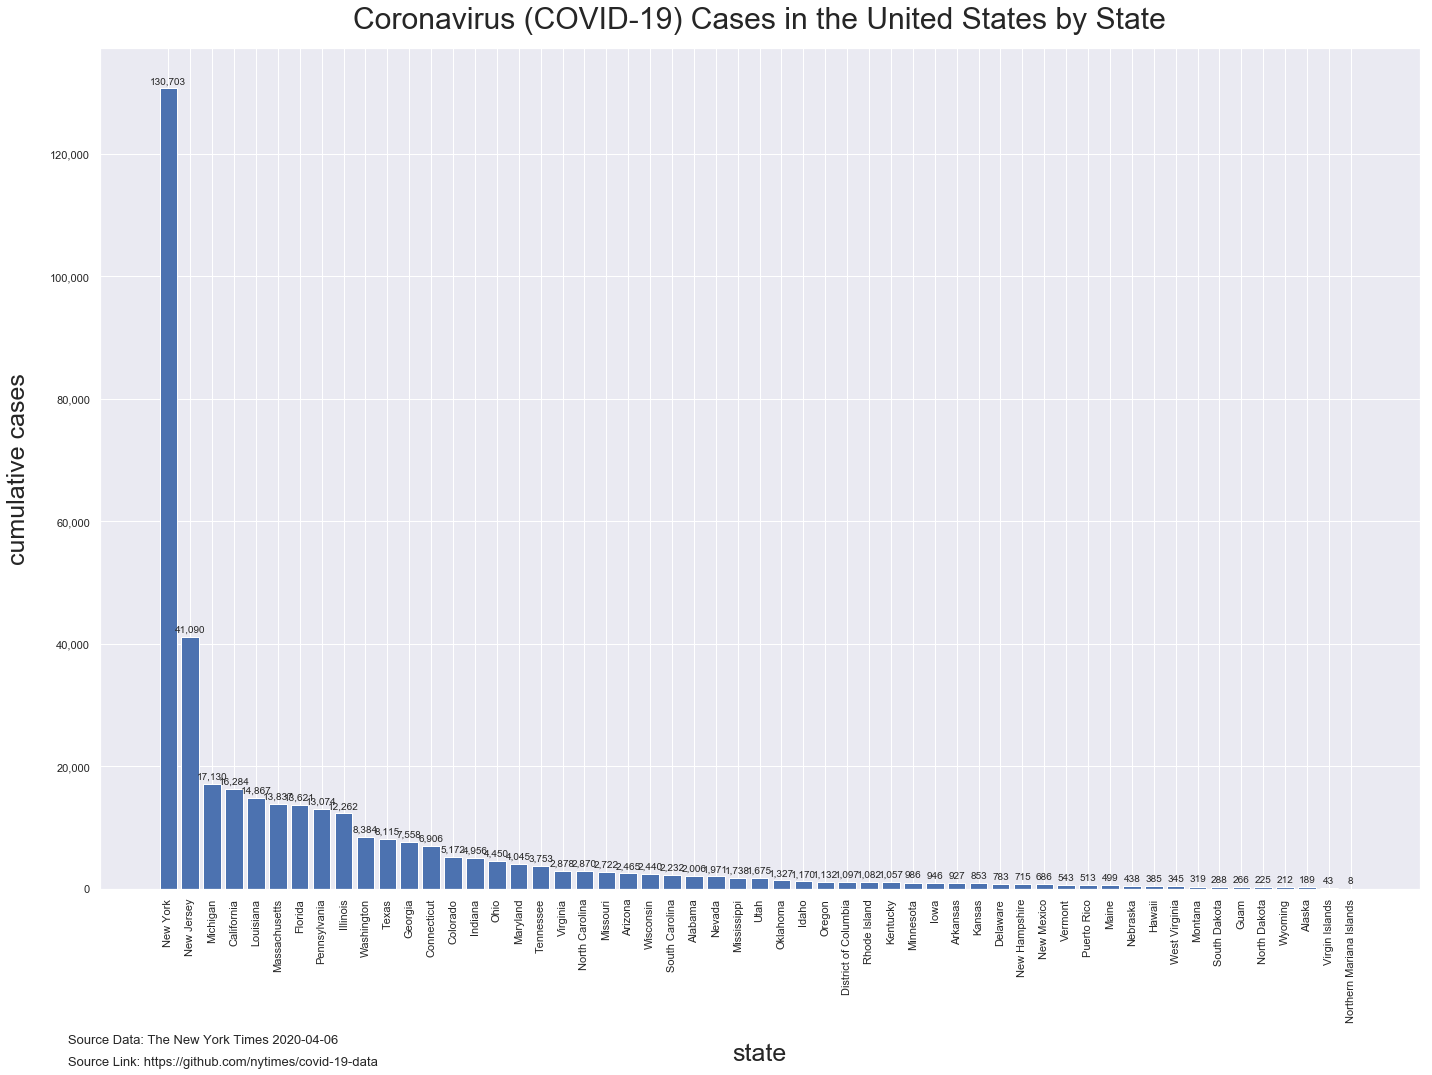

In [143]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=False)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label = ax.bar(bar.index, bar.cases)
plt.xlabel("state", labelpad=14, fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("cumulative cases", labelpad=14, fontsize=25)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(label)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Coronavirus (COVID-19) Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-bar')

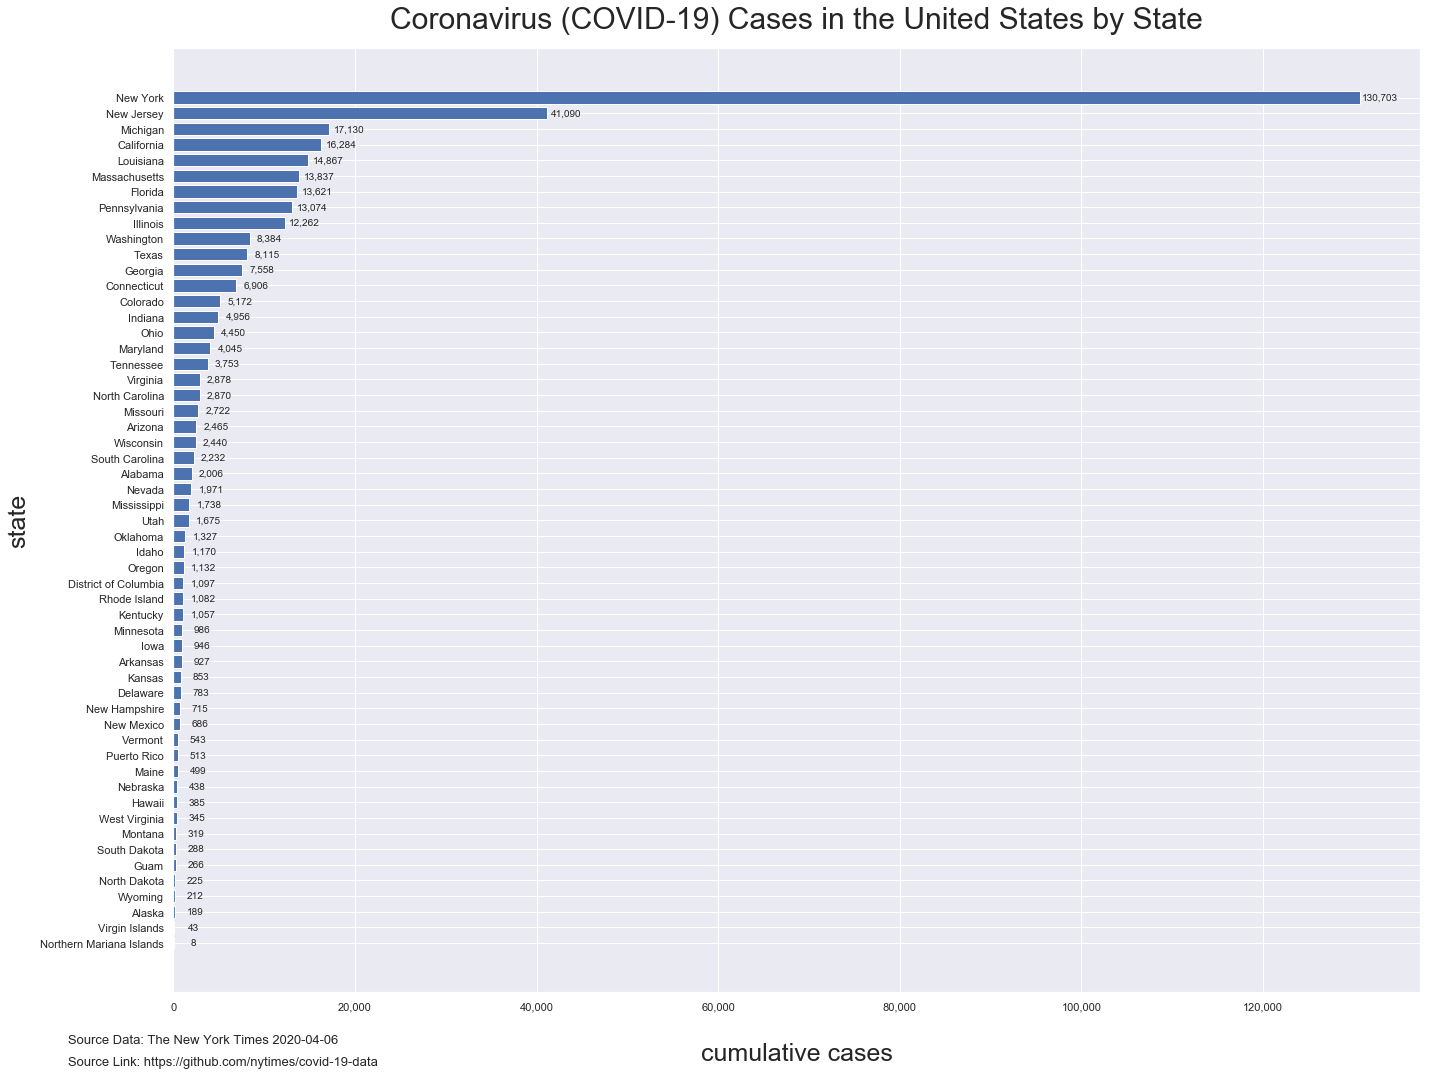

In [144]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=True)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar.index, bar.cases)
plt.xlabel("cumulative cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("state", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Coronavirus (COVID-19) Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-barh')

# I have downloaded the shapefile already

In [145]:
#url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip'

# data_path = 'data'
# fullfilename = os.path.join(data_path, 'state_shape.gz')
# urllib.request.urlretrieve(url, fullfilename)

In [146]:
#file_path = 'data/state_shape.gz'

# items = zipfile.ZipFile(file_path)

# available files in the container
# print(items.namelist())

In [147]:
# opening Zip using 'with' keyword in read mode
# with zipfile.ZipFile(file_path, 'r') as file:
#     file.extractall(data_path)

In [148]:
states_shape = gpd.GeoDataFrame.from_file('data/cb_2018_us_state_500k.shp')

In [149]:
states_shape.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  (POLYGON ((-88.502966 30.215235, -88.491759 30...  
1  (POLYGON ((-75.72680699999999 35.935844, -75.7...  
2  POLYGON ((-103.002565 36.526588, -103.002188 3...  
3  (POLYGON ((-75.742406 37.80835, -75.741512 37....  
4  POLYGON ((-82.6431981036679 38.1690897960737, ...

In [150]:
bar_drop_index = bar.reset_index(drop=True)

states_shape_cases = states_shape.merge(bar_drop_index, left_on='NAME', right_on='state')

In [151]:
states_shape_cases.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry       date  \
0  (POLYGON ((-88.502966 30.215235, -88.491759 30... 2020-04-06   
1  (POLYGON ((-75.72680699999999 35.935844, -75.7... 2020-04-06   
2  POLYGON ((-103.002565 36.526588, -103.002188 3... 2020-04-06   
3  (POLYGON ((-75.742406 37.80835, -75.741512 37.... 2020-04-06   
4  POLYGON ((-82.6431981036679 38.1690897960737, ... 2020-04-06   

            state  fips  cases  deaths  
0     Mississippi    28   1738      51  
1  North Carolina    37   2870      40  
2        Oklahoma    40   1327      51  
3        Virginia    51   2878      54  
4   West Virginia    54    345       4

In [152]:
states_shape_cases.STUSPS.unique()

array(['MS', 'NC', 'OK', 'VA', 'WV', 'LA', 'MI', 'MA', 'ID', 'FL', 'NE',
       'WA', 'NM', 'PR', 'SD', 'TX', 'CA', 'AL', 'GA', 'PA', 'MO', 'CO',
       'UT', 'TN', 'WY', 'NY', 'KS', 'AK', 'NV', 'IL', 'VT', 'MT', 'IA',
       'SC', 'NH', 'AZ', 'DC', 'NJ', 'MD', 'ME', 'HI', 'DE', 'GU', 'RI',
       'KY', 'OH', 'WI', 'OR', 'ND', 'AR', 'IN', 'MN', 'CT'], dtype=object)

(-2259318.989842429,
 2743787.7776512564,
 -2259441.9737315555,
 874818.5571526419)

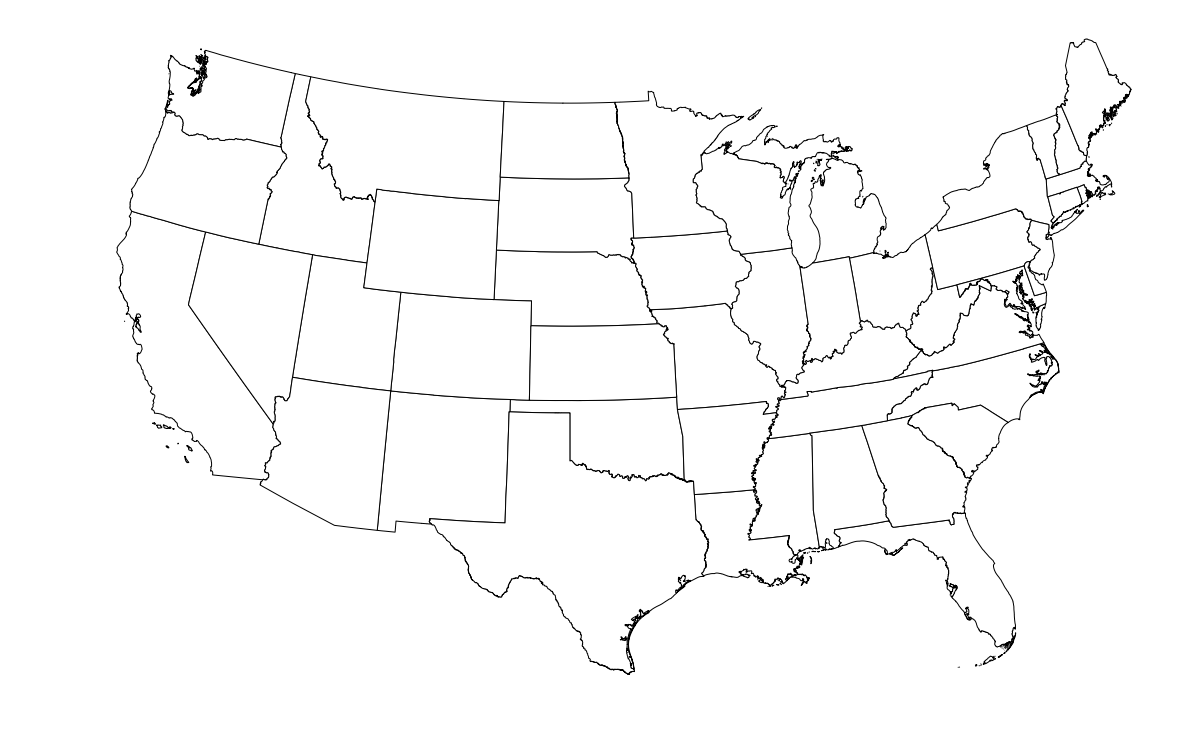

In [153]:
fig, ax = plt.subplots(figsize=(20,15))

delete_states = ['AK', 'HI', 'PR', 'GU']
states_shape_cases  = states_shape_cases.loc[~states_shape_cases['STUSPS'].isin(delete_states)]
states_shape_cases = states_shape_cases.to_crs(epsg=2163)

states_shape_cases.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [154]:
states_shape_cases['point'] = states_shape_cases['geometry'].centroid
state_points = states_shape_cases[['point', 'NAME', 'cases']]
state_points = state_points.set_geometry('point')
state_points['coords'] = state_points['point'].apply(lambda x: x.representative_point().coords[:])
state_points['coords'] = [state_points[0] for state_points in state_points['coords']]

In [155]:
state_points.head()

point            NAME  cases  \
0  POINT (968900.5142401541 -1302349.006773153)     Mississippi   1738   
1  POINT (1849270.427707764 -820703.8884651705)  North Carolina   2870   
2  POINT (227351.7828779383 -1041651.468761091)        Oklahoma   1327   
3  POINT (1846721.444074068 -594717.0352157739)        Virginia   2878   
4  POINT (1666480.709214782 -511066.3749840383)   West Virginia    345   

                                     coords  
0  (968900.5142401541, -1302349.0067731533)  
1  (1849270.4277077643, -820703.8884651705)  
2  (227351.7828779383, -1041651.4687610908)  
3  (1846721.4440740685, -594717.0352157739)  
4   (1666480.709214782, -511066.3749840383)

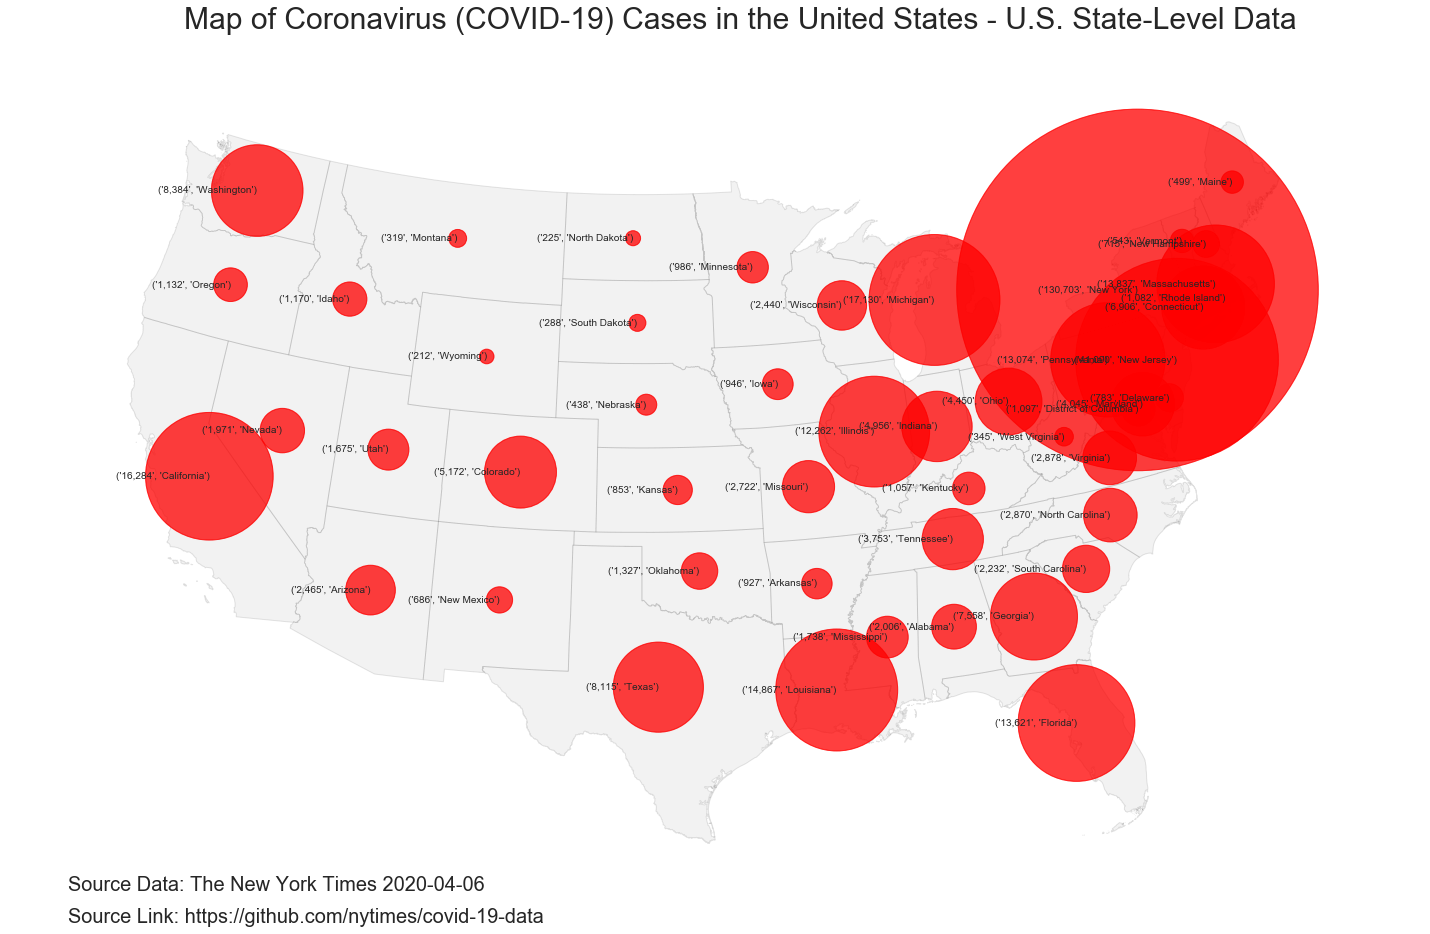

In [156]:
fig, ax = plt.subplots(figsize=(20,15))

states_shape_cases.plot(ax=ax, color='gray', edgecolor='black', alpha=.1)
state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)

state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)
for idx, row in state_points.iterrows():
    plt.annotate(s=('{:,}'.format(row['cases']), row['NAME']), xy=row['coords'],
                 horizontalalignment='right', va='center')
    
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.1, txt, wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.05, 0.07, txt2, wrap=True, horizontalalignment='left', fontsize=20)

ax.set_title('Map of Coronavirus (COVID-19) Cases in the United States - U.S. State-Level Data', fontsize=30)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map')

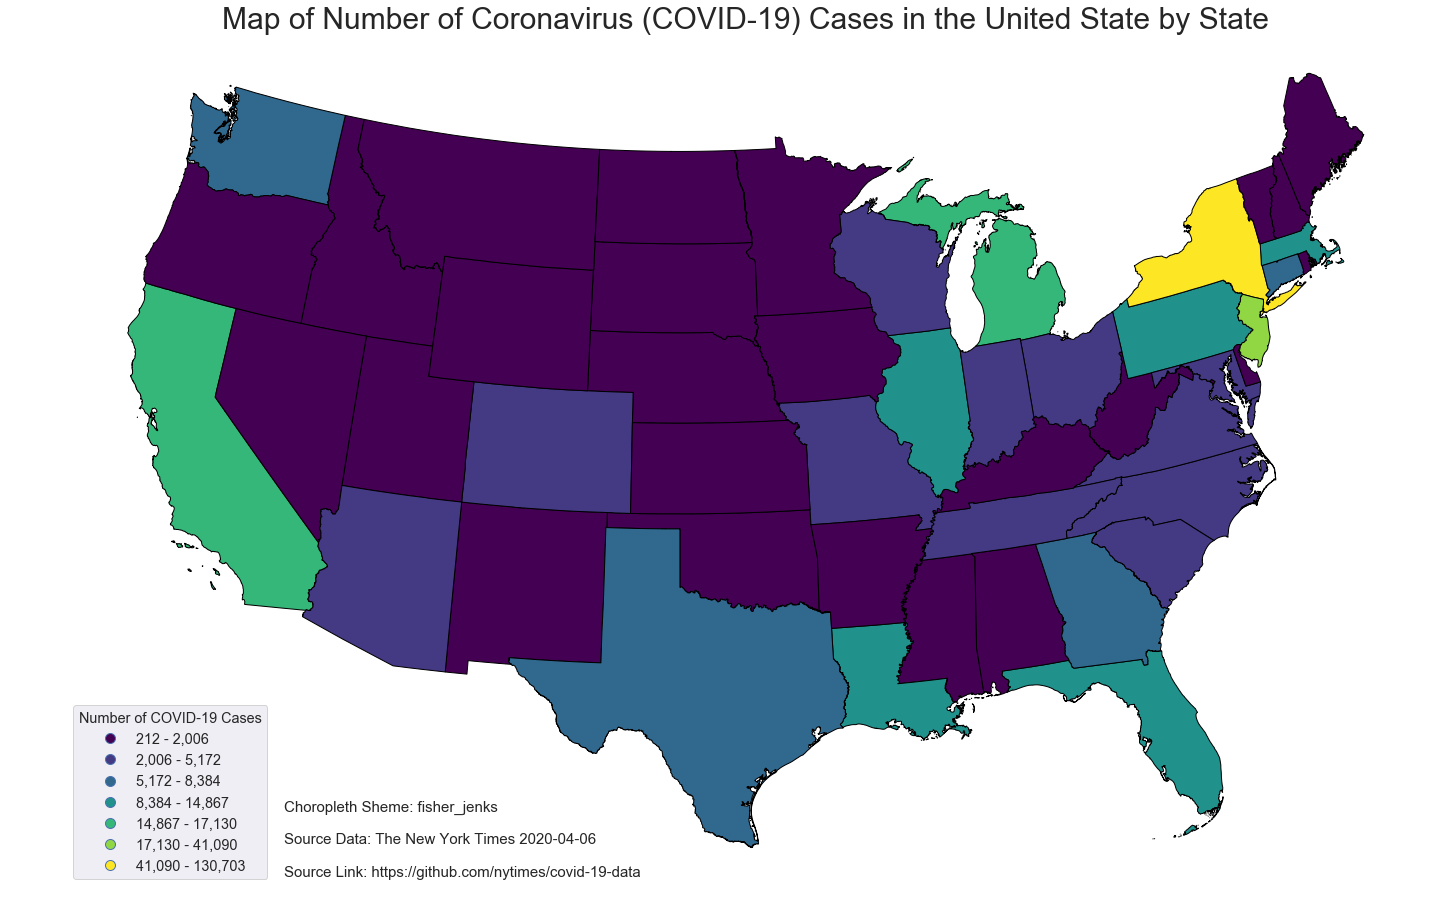

In [157]:
# defining our plot
plt.subplots(figsize=(20,15))
ax = plt.subplot()

fig = states_shape_cases.plot(column=("cases"), ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'lower left', 'title': 'Number of COVID-19 Cases', 
                   'title_fontsize': 'x-large','fontsize': 'x-large'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Map of Number of Coronavirus (COVID-19) Cases in the United State by State", fontsize=30)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
txt3 = ('Choropleth Sheme: fisher_jenks')
plt.figtext(0.2, 0.145, txt, wrap=True, horizontalalignment='left', fontsize=15)
plt.figtext(0.2, 0.115, txt2, wrap=True, horizontalalignment='left', fontsize=15)
plt.figtext(0.2, 0.175, txt3, wrap=True, horizontalalignment='left', fontsize=15)

leg = fig.get_legend()
leg._loc = 3

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map-choro')

In [158]:
bar.head()

date                     state  fips  cases  \
state                                                                        
Northern Mariana Islands 2020-04-06  Northern Mariana Islands    69      8   
Virgin Islands           2020-04-06            Virgin Islands    78     43   
Alaska                   2020-04-06                    Alaska     2    189   
Wyoming                  2020-04-06                   Wyoming    56    212   
North Dakota             2020-04-06              North Dakota    38    225   

                          deaths  
state                             
Northern Mariana Islands       1  
Virgin Islands                 1  
Alaska                         4  
Wyoming                        0  
North Dakota                   3

In [159]:
bar.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

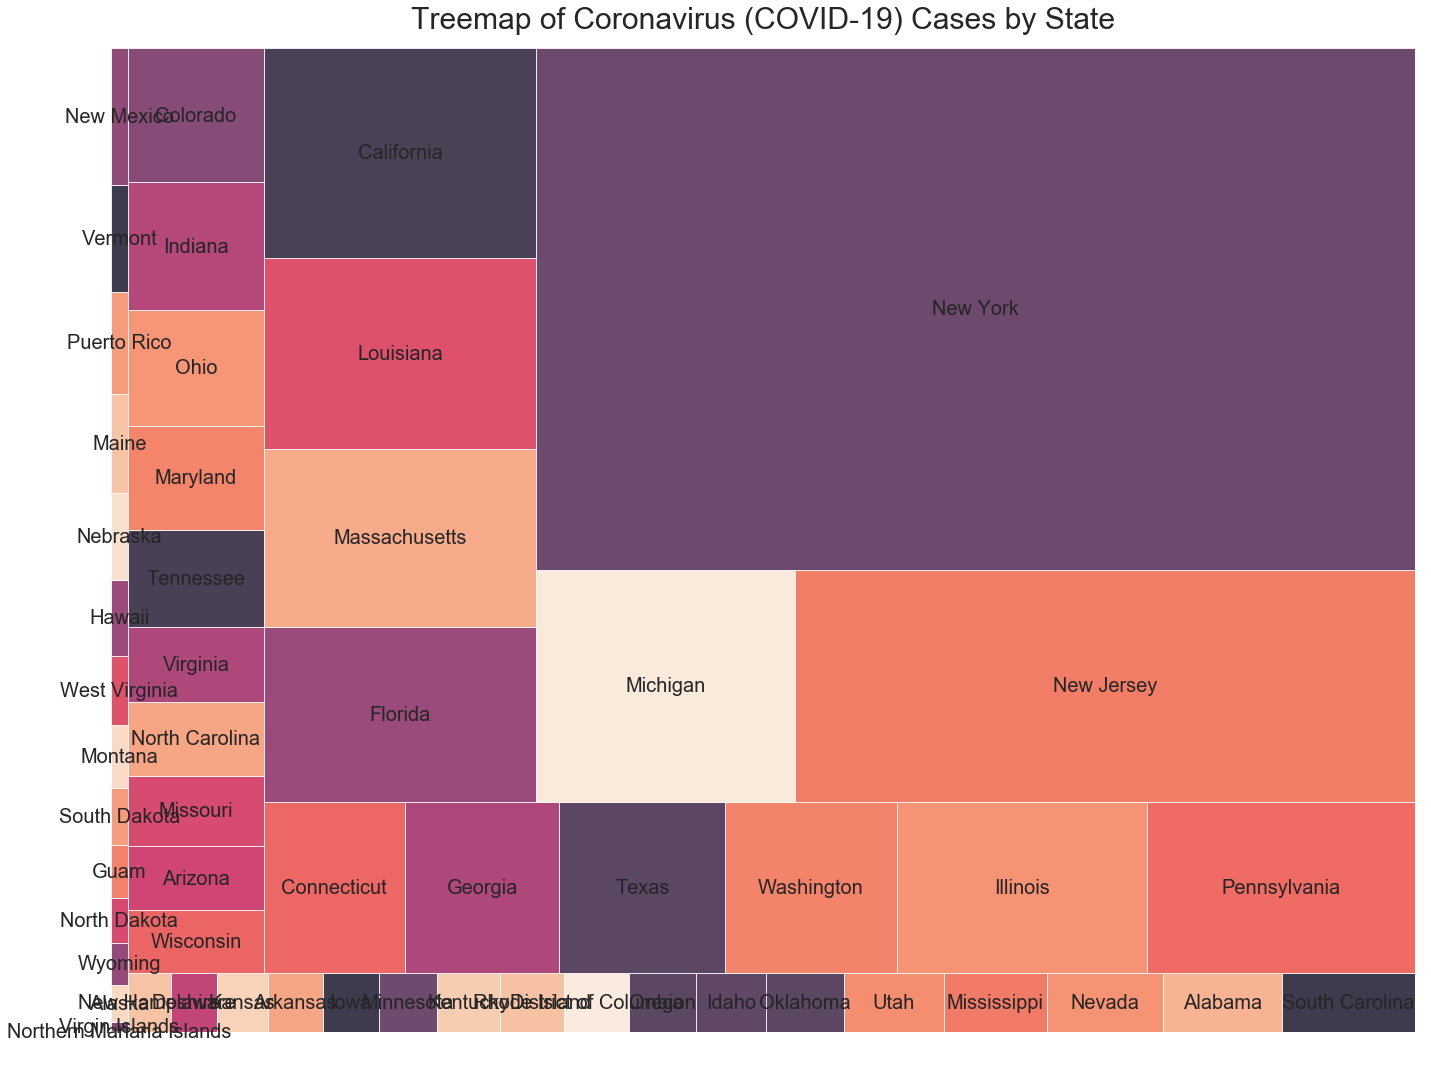

In [160]:
fig, ax = plt.subplots(figsize=(20,15))
squarify.plot(sizes=bar['cases'], label=bar['state'], alpha=.8, ax=ax, text_kwargs={'fontsize':20})
ax.set_title('Treemap of Coronavirus (COVID-19) Cases by State', fontsize=30, pad = 20)
ax.set_xlabel('Source Data: The New York Times' + current_date + 
              'n\Source Link: https://github.com/nytimes/covid-19-data', fontsize=10)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-treemap')

In [161]:
covid_19_state_data.to_csv('data/us-states-raw-data.csv', index=False)
g.to_csv('data/us-states-grouped-day.csv')
bar.to_csv('data/us-states-grouped-states.csv')